# DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING

In [1]:
!pip install U ppscore

  Using cached ppscore-1.3.0-py2.py3-none-any.whl
  Using cached pandas-1.5.3.tar.gz (5.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: still running...
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build pandas


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [2517 lines of output]
  <string>:19: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-312
  creating build\lib.win-amd64-cpython-312\pandas
  copying pandas\conftest.py -> build\lib.win-amd64-cpython-312\pandas
  copying pandas\testing.py -> build\lib.win-amd64-cpython-312\pandas
  copying pandas\_typing.py -> build\lib.win-amd64-cpython-312\pandas
  copying pandas\_version.py -> build\lib.win-amd64-cpython-312\pandas
  copying pandas\__init__.py -> build\lib.win-amd64-cpython-312\pandas
  creating build\lib.win-amd64-cpython-312\pandas\api
  copying pandas\api\__init__.py -> build\lib.win-amd64-cpython-312\pandas\api
  creating build\lib.win-amd64-cpython-312\pandas\arrays
  copying pandas\arrays\__init__.py -> build\lib.win-amd64-cpython-312\p

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['figure.dpi'] = 200
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import IsolationForest
%matplotlib inline

In [4]:
df = pd.read_csv('adult_with_headers.csv')
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.describe(include='object')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


From describe for object columns we observe the following
* Now there are no missing values.
* Most of the people work in Private sector.
* Most of the people are White.
* Almost 90% people are from United-States.
* Almost 75% people are having income less than or equal to 50K.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [9]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=['number']).columns.tolist()

In [10]:
for col in cat_cols:
    print('Column :', col)
    print(df[col].unique())
    print(df[col].value_counts())
    print('---------------------------------')

Column : workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
---------------------------------
Column : education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Pres

In [11]:
df[cat_cols] = df[cat_cols].applymap(lambda x: x.replace(' ', ''))

In [12]:
df.replace('?',np.nan, inplace=True)

In [13]:
for col in cat_cols:
    print('Column :', col)
    print(df[col].unique())
    print(df[col].value_counts())
    print('---------------------------------')

Column : workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
---------------------------------
Column : education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
-------

### Scaling the data

In [14]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
df_numerical = df.select_dtypes(include='number')
num_cols = df_numerical.columns
num_cols

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [15]:
#Standardization
scaled_num_data1 = df
sc = StandardScaler()
scaled_num_data1[num_cols]= sc.fit_transform(df[num_cols])
scaled_num_data1

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.030671,State-gov,-1.063611,Bachelors,1.134739,Never-married,Adm-clerical,Not-in-family,White,Male,0.148453,-0.21666,-0.035429,United-States,<=50K
1,0.837109,Self-emp-not-inc,-1.008707,Bachelors,1.134739,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145920,-0.21666,-2.222153,United-States,<=50K
2,-0.042642,Private,0.245079,HS-grad,-0.420060,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
3,1.057047,Private,0.425801,11th,-1.197459,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
4,-0.775768,Private,1.408176,Bachelors,1.134739,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145920,-0.21666,-0.035429,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,Private,0.639741,Assoc-acdm,0.746039,Married-civ-spouse,Tech-support,Wife,White,Female,-0.145920,-0.21666,-0.197409,United-States,<=50K
32557,0.103983,Private,-0.335433,HS-grad,-0.420060,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,-0.145920,-0.21666,-0.035429,United-States,>50K
32558,1.423610,Private,-0.358777,HS-grad,-0.420060,Widowed,Adm-clerical,Unmarried,White,Female,-0.145920,-0.21666,-0.035429,United-States,<=50K
32559,-1.215643,Private,0.110960,HS-grad,-0.420060,Never-married,Adm-clerical,Own-child,White,Male,-0.145920,-0.21666,-1.655225,United-States,<=50K


In [16]:
scaled_num_data1.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04
mean,-2.705915e-17,-1.001625e-16,1.471887e-16,1.309314e-17,1.016900e-16,-1.549355e-17
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-1.582206e+00,-1.681631e+00,-3.529656e+00,-1.459205e-01,-2.166595e-01,-3.194030e+00
25%,-7.757679e-01,-6.816910e-01,-4.200596e-01,-1.459205e-01,-2.166595e-01,-3.542945e-02
50%,-1.159546e-01,-1.082193e-01,-3.136003e-02,-1.459205e-01,-2.166595e-01,-3.542945e-02
75%,6.904838e-01,4.478765e-01,7.460392e-01,-1.459205e-01,-2.166595e-01,3.695194e-01
max,3.769612e+00,1.226856e+01,2.300838e+00,1.339458e+01,1.059351e+01,4.742967e+00


In [17]:
scaled_num_data1.describe(include=object)

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [18]:
#MinMaxScalar
mn = MinMaxScaler()
df[num_cols] = mn.fit_transform(df[num_cols])
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.301370,State-gov,0.044302,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.021740,0.0,0.397959,United-States,<=50K
1,0.452055,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States,<=50K
2,0.287671,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States,<=50K
3,0.493151,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States,<=50K
4,0.150685,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,Private,0.166404,Assoc-acdm,0.733333,Married-civ-spouse,Tech-support,Wife,White,Female,0.000000,0.0,0.377551,United-States,<=50K
32557,0.315068,Private,0.096500,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.000000,0.0,0.397959,United-States,>50K
32558,0.561644,Private,0.094827,HS-grad,0.533333,Widowed,Adm-clerical,Unmarried,White,Female,0.000000,0.0,0.397959,United-States,<=50K
32559,0.068493,Private,0.128499,HS-grad,0.533333,Never-married,Adm-clerical,Own-child,White,Male,0.000000,0.0,0.193878,United-States,<=50K


In [19]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,0.295639,0.120545,0.605379,0.010777,0.020042,0.402423
std,0.186855,0.071685,0.171515,0.073854,0.092507,0.125994
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.071679,0.533333,0.000000,0.000000,0.397959
50%,0.273973,0.112788,0.600000,0.000000,0.000000,0.397959
75%,0.424658,0.152651,0.733333,0.000000,0.000000,0.448980
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Standard Scaling (Z-score Normalization)-  Transforms data to have a mean of 0 and a standard deviation of 1. 
Preferred Scenarios:
Algorithms Assuming Normal Distribution: e.g., linear regression, logistic regression.
Different Feature Distributions: Ensures equal contribution, e.g., SVM, PCA.
Gradient Descent Algorithms: Faster, more reliable convergence.

#### Min-Max Scaling (Normalization)-Transforms data to fit within a specific range, typically [0, 1]. 
Preferred Scenarios:Distribution-Agnostic Algorithms: e.g., k-means clustering, neural networks.
Same Scale Features: Preserves relationships, useful in distance-based methods.
Specific Range Requirement: e.g., image processing (pixel values). Summary
Standard Scaling: For normal distribution assumptions, handling outliers, and gradient descent.
Min-Max Scaling: For specific range requirements, distribution-agnostic algorithms, and distance-based methods.

## Encoding the data

In [20]:
# Applying Ohe Hot Encoding

df.describe(include='object')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [21]:

#Columns "sex" and "income" are with less than 5 categories, but as "income" column is a target column. We will apply One-Hot Encoding only on "sex" column.
df = pd.get_dummies(data=df,columns= ['sex'], dtype= int)
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,sex_Female,sex_Male
0,0.301370,State-gov,0.044302,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,0.021740,0.0,0.397959,United-States,<=50K,0,1
1,0.452055,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,0.000000,0.0,0.122449,United-States,<=50K,0,1
2,0.287671,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,0.000000,0.0,0.397959,United-States,<=50K,0,1
3,0.493151,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,0.000000,0.0,0.397959,United-States,<=50K,0,1
4,0.150685,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,0.000000,0.0,0.397959,Cuba,<=50K,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,Private,0.166404,Assoc-acdm,0.733333,Married-civ-spouse,Tech-support,Wife,White,0.000000,0.0,0.377551,United-States,<=50K,1,0
32557,0.315068,Private,0.096500,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,White,0.000000,0.0,0.397959,United-States,>50K,0,1
32558,0.561644,Private,0.094827,HS-grad,0.533333,Widowed,Adm-clerical,Unmarried,White,0.000000,0.0,0.397959,United-States,<=50K,1,0
32559,0.068493,Private,0.128499,HS-grad,0.533333,Never-married,Adm-clerical,Own-child,White,0.000000,0.0,0.193878,United-States,<=50K,0,1


### **Using Label Encoding for categorical variables with more than 5 categories.**

In [22]:
from sklearn import preprocessing
cat_columns = list(df.select_dtypes(include='object').columns)
label_encoder = preprocessing.LabelEncoder()
df[cat_columns] = df[cat_columns].apply(label_encoder.fit_transform)
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,sex_Female,sex_Male
0,0.301370,6,0.044302,9,0.800000,4,0,1,4,0.021740,0.0,0.397959,38,0,0,1
1,0.452055,5,0.048238,9,0.800000,2,3,0,4,0.000000,0.0,0.122449,38,0,0,1
2,0.287671,3,0.138113,11,0.533333,0,5,1,4,0.000000,0.0,0.397959,38,0,0,1
3,0.493151,3,0.151068,1,0.400000,2,5,0,2,0.000000,0.0,0.397959,38,0,0,1
4,0.150685,3,0.221488,9,0.800000,2,9,5,2,0.000000,0.0,0.397959,4,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,3,0.166404,7,0.733333,2,12,5,4,0.000000,0.0,0.377551,38,0,1,0
32557,0.315068,3,0.096500,11,0.533333,2,6,0,4,0.000000,0.0,0.397959,38,1,0,1
32558,0.561644,3,0.094827,11,0.533333,6,0,4,4,0.000000,0.0,0.397959,38,0,1,0
32559,0.068493,3,0.128499,11,0.533333,4,0,3,4,0.000000,0.0,0.193878,38,0,0,1


In [23]:
df.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,sex_Female,sex_Male
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,0.295639,3.376371,0.120545,10.298210,0.605379,2.611836,6.421762,1.446362,3.665858,0.010777,0.020042,0.402423,36.470870,0.240810,0.330795,0.669205
std,0.186855,1.582038,0.071685,3.870264,0.171515,1.506222,4.328619,1.606771,0.848806,0.073854,0.092507,0.125994,6.083092,0.427581,0.470506,0.470506
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,3.000000,0.071679,9.000000,0.533333,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.397959,38.000000,0.000000,0.000000,0.000000
50%,0.273973,3.000000,0.112788,11.000000,0.600000,2.000000,6.000000,1.000000,4.000000,0.000000,0.000000,0.397959,38.000000,0.000000,0.000000,1.000000
75%,0.424658,3.000000,0.152651,12.000000,0.733333,4.000000,10.000000,3.000000,4.000000,0.000000,0.000000,0.448980,38.000000,0.000000,1.000000,1.000000
max,1.000000,8.000000,1.000000,15.000000,1.000000,6.000000,14.000000,5.000000,4.000000,1.000000,1.000000,1.000000,41.000000,1.000000,1.000000,1.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   workclass       32561 non-null  int32  
 2   fnlwgt          32561 non-null  float64
 3   education       32561 non-null  int32  
 4   education_num   32561 non-null  float64
 5   marital_status  32561 non-null  int32  
 6   occupation      32561 non-null  int32  
 7   relationship    32561 non-null  int32  
 8   race            32561 non-null  int32  
 9   capital_gain    32561 non-null  float64
 10  capital_loss    32561 non-null  float64
 11  hours_per_week  32561 non-null  float64
 12  native_country  32561 non-null  int32  
 13  income          32561 non-null  int32  
 14  sex_Female      32561 non-null  int32  
 15  sex_Male        32561 non-null  int32  
dtypes: float64(6), int32(10)
memory usage: 2.7 MB


 ## Feature Engineering

In [25]:
data = pd.read_csv('adult_with_headers.csv')
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [26]:
# Categorical and Numerical columns lists
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
num_cols = data.select_dtypes(include=['number']).columns.tolist()

In [27]:
data[cat_cols] = data[cat_cols].applymap(lambda x: x.replace(' ', ''))

In [28]:
data['marital_status'].value_counts()

marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

In [29]:
data.replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse','Never-married','Divorced','Separated','Widowed'],
             ['Married','Married','Married','Unmarried','Unmarried','Unmarried','Unmarried'], inplace=True)

In [30]:
data['marital_status'].value_counts()

marital_status
Unmarried    17144
Married      15417
Name: count, dtype: int64

In [31]:
data['marital_status'] = np.where(data['marital_status'] == 'Married', 1, 0)

In [32]:
df['marital_status_new'] = data['marital_status']

In [33]:
#Since most of the people are from United-States, we can create a new binary column "native_country_new" whose entries are either From_US or Not_from_US

In [34]:
data['native_country'].value_counts()

native_country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [35]:
data['native_country'] = np.where(data['native_country'] == 'United-States', 1, 0)

In [36]:
df['native_country_new'] = data['native_country']

In [37]:
# Drop old columns "marital_status" and "native_country"
df.drop(columns=['marital_status','native_country'], inplace=True)

In [38]:
df.describe()

,age,workclass,fnlwgt,education,education_num,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,income,sex_Female,sex_Male,marital_status_new,native_country_new
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,0.295639,3.376371,0.120545,10.298210,0.605379,6.421762,1.446362,3.665858,0.010777,0.020042,0.402423,0.240810,0.330795,0.669205,0.473481,0.895857
std,0.186855,1.582038,0.071685,3.870264,0.171515,4.328619,1.606771,0.848806,0.073854,0.092507,0.125994,0.427581,0.470506,0.470506,0.499304,0.305451
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,3.000000,0.071679,9.000000,0.533333,3.000000,0.000000,4.000000,0.000000,0.000000,0.397959,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.273973,3.000000,0.112788,11.000000,0.600000,6.000000,1.000000,4.000000,0.000000,0.000000,0.397959,0.000000,0.000000,1.000000,0.000000,1.000000
75%,0.424658,3.000000,0.152651,12.000000,0.733333,10.000000,3.000000,4.000000,0.000000,0.000000,0.448980,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,8.000000,1.000000,15.000000,1.000000,14.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Applying a transformation (e.g., log transformation) to at least one skewed numerical feature and justify choice.

Column: age


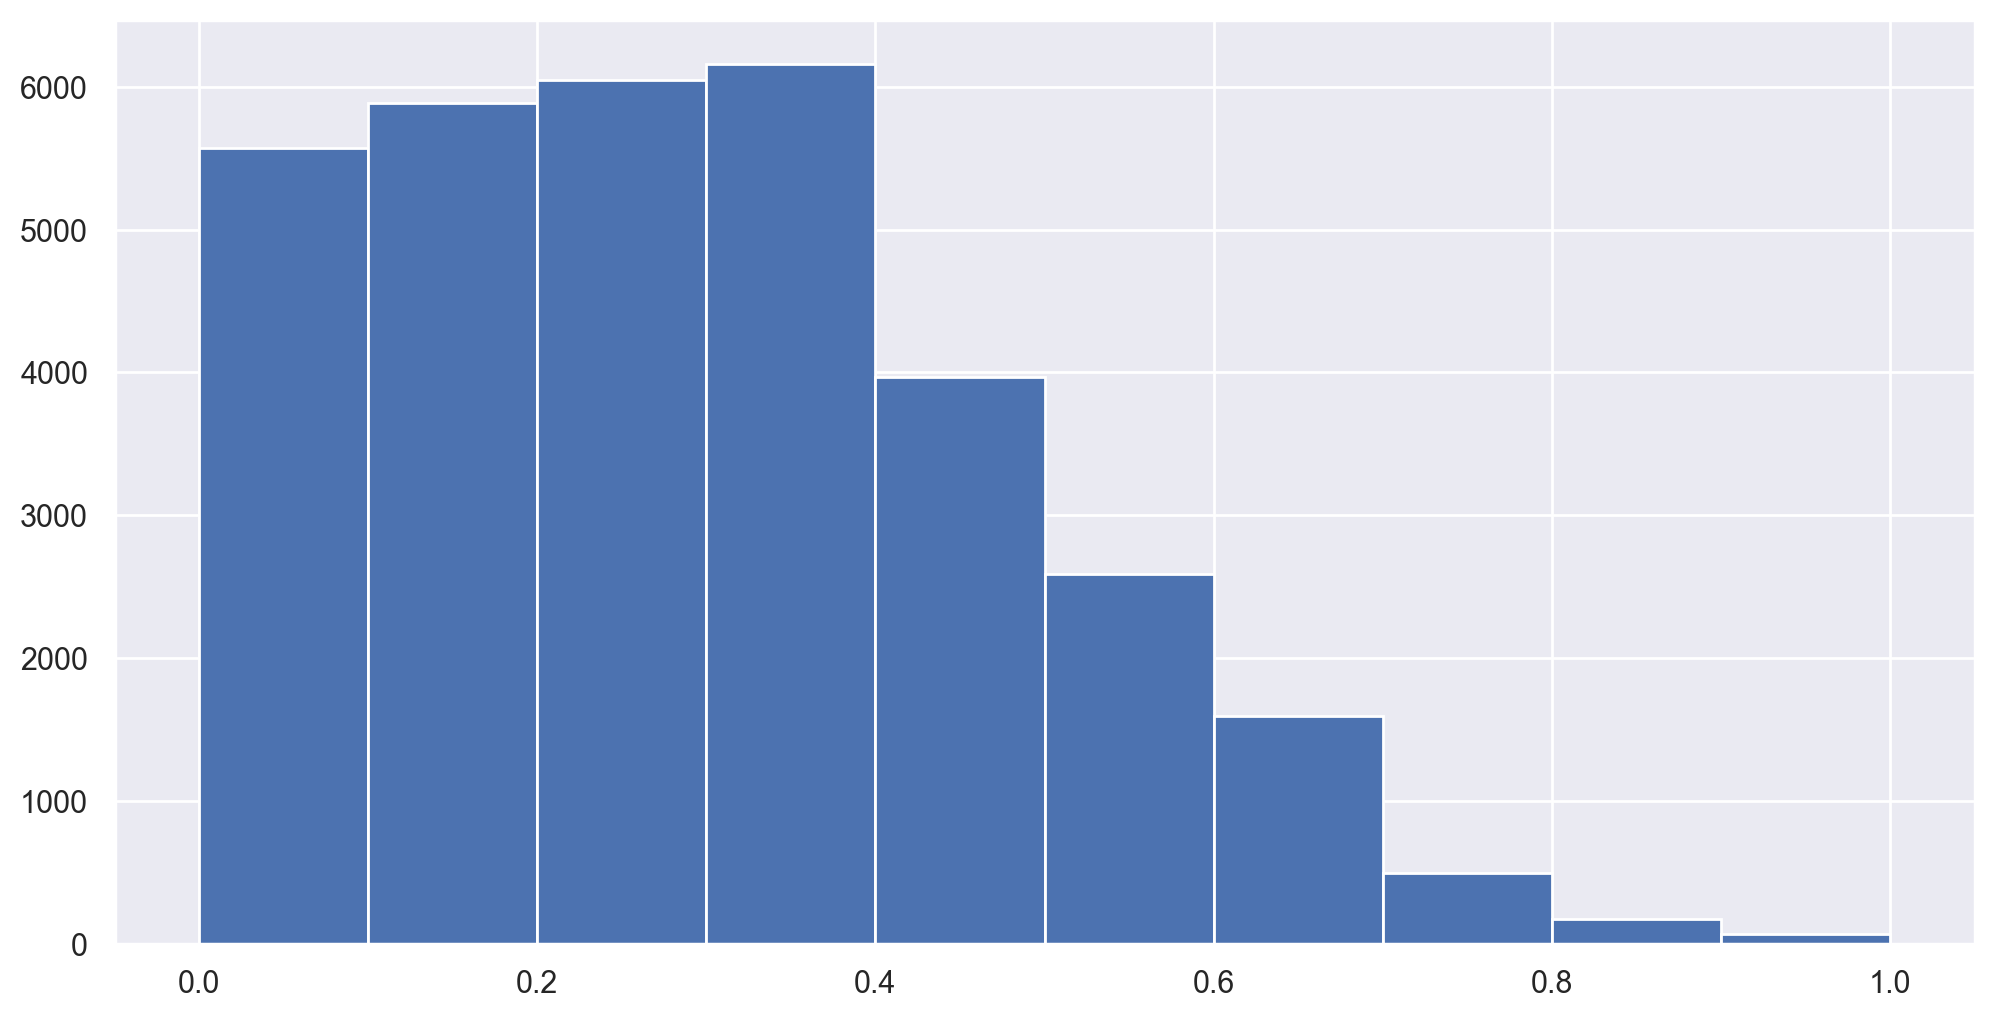

Column: workclass


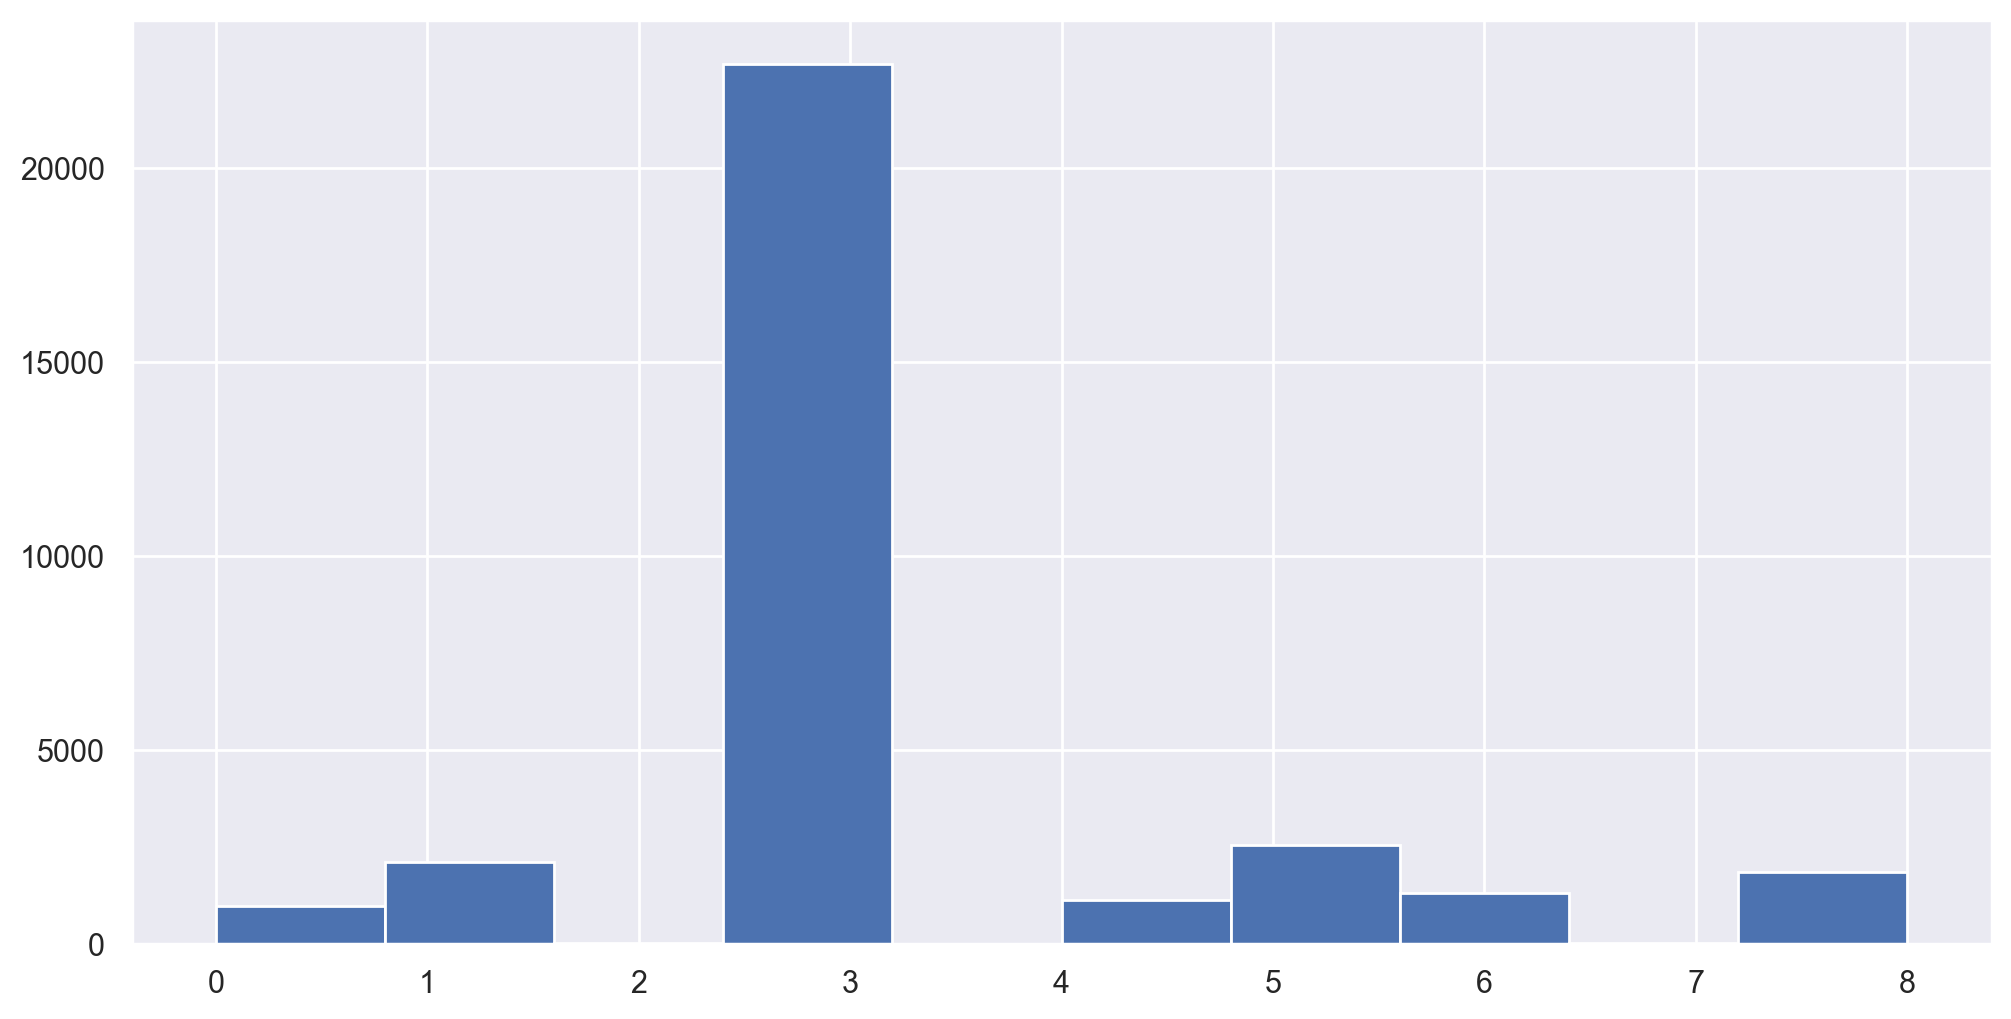

Column: fnlwgt


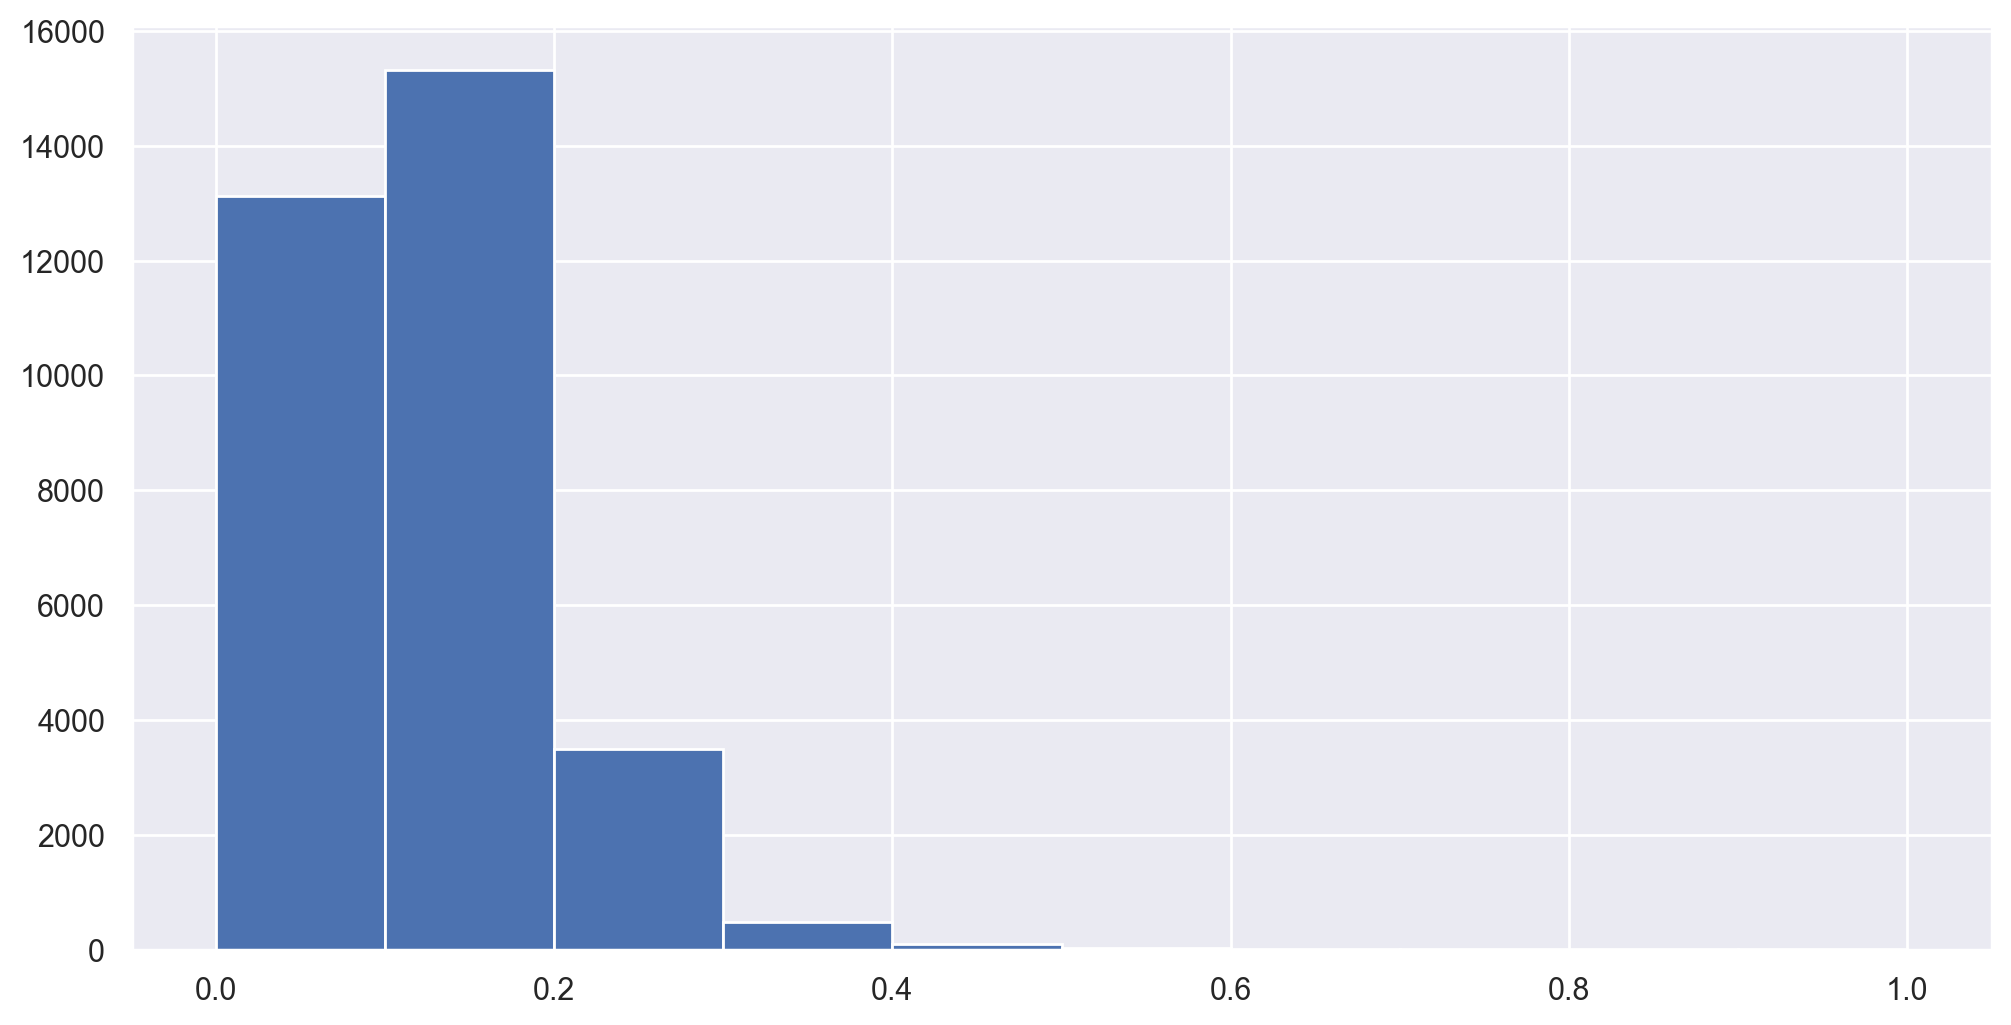

Column: education


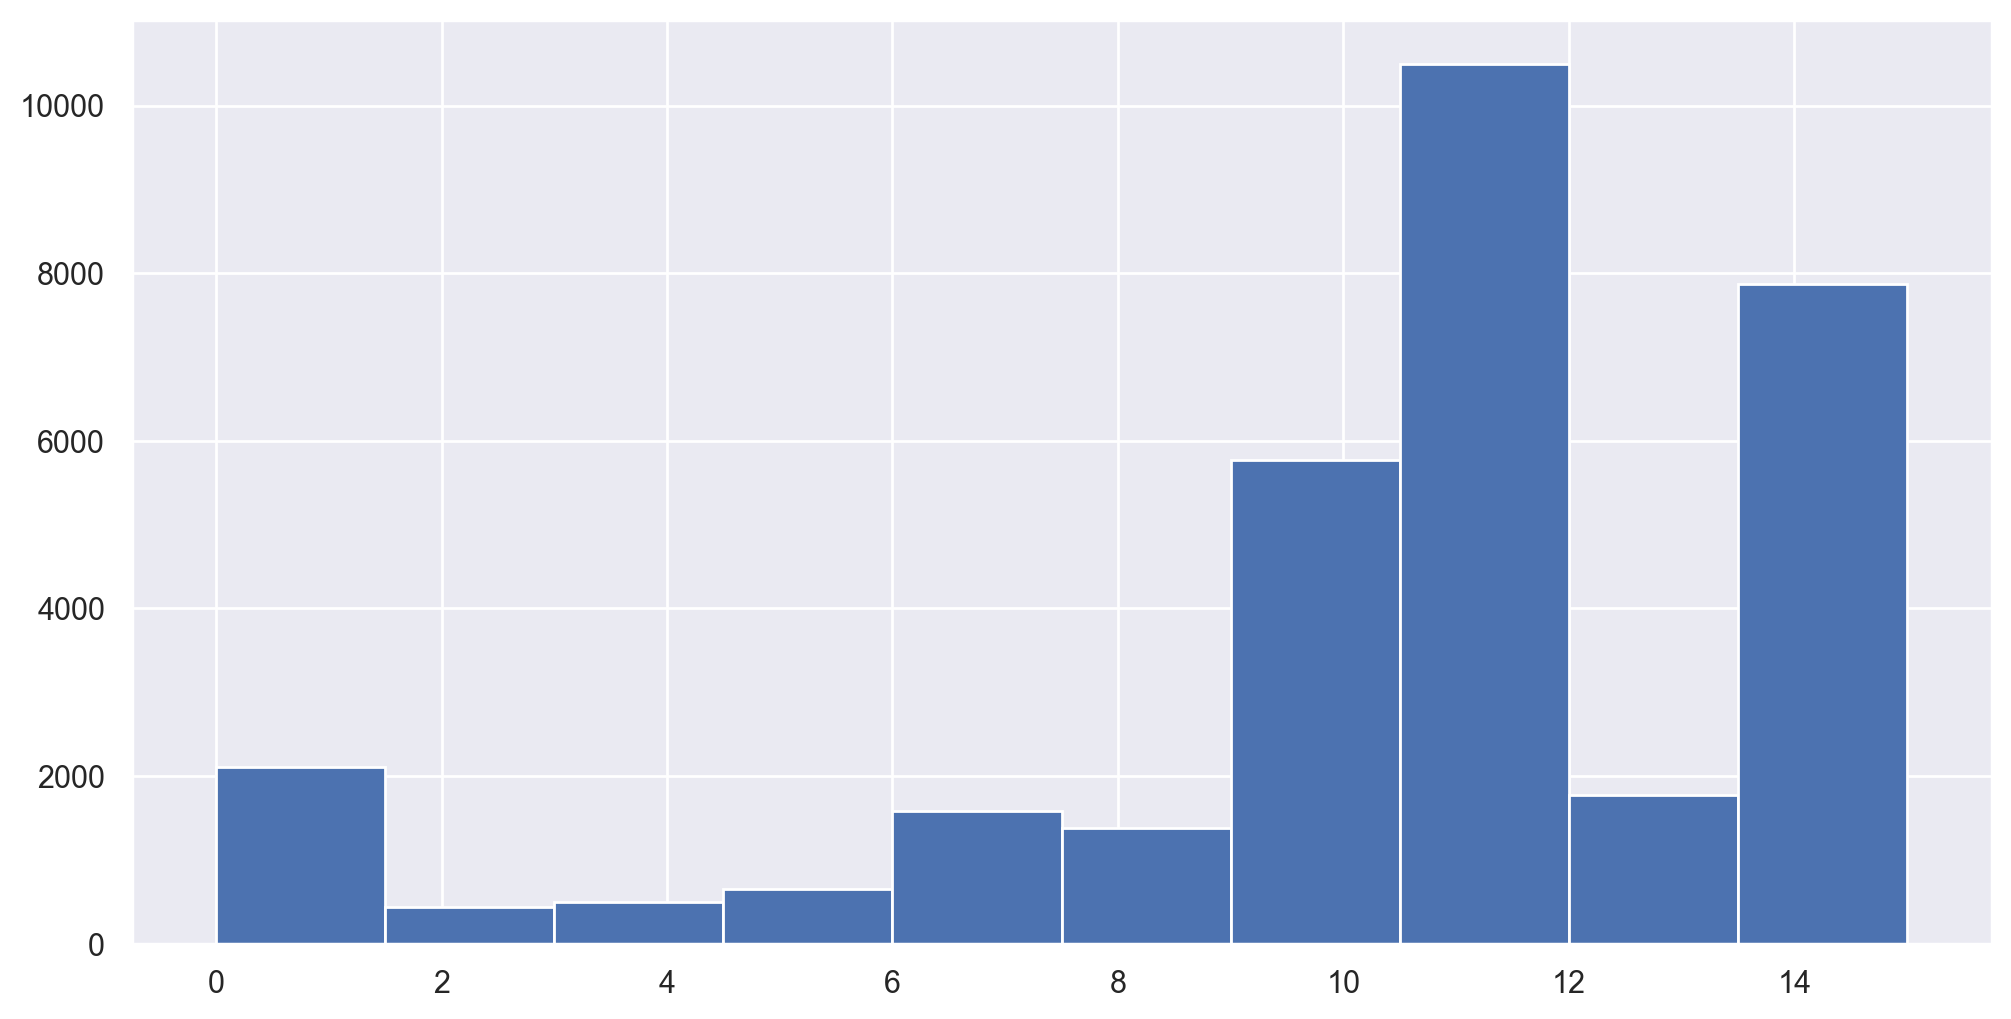

Column: education_num


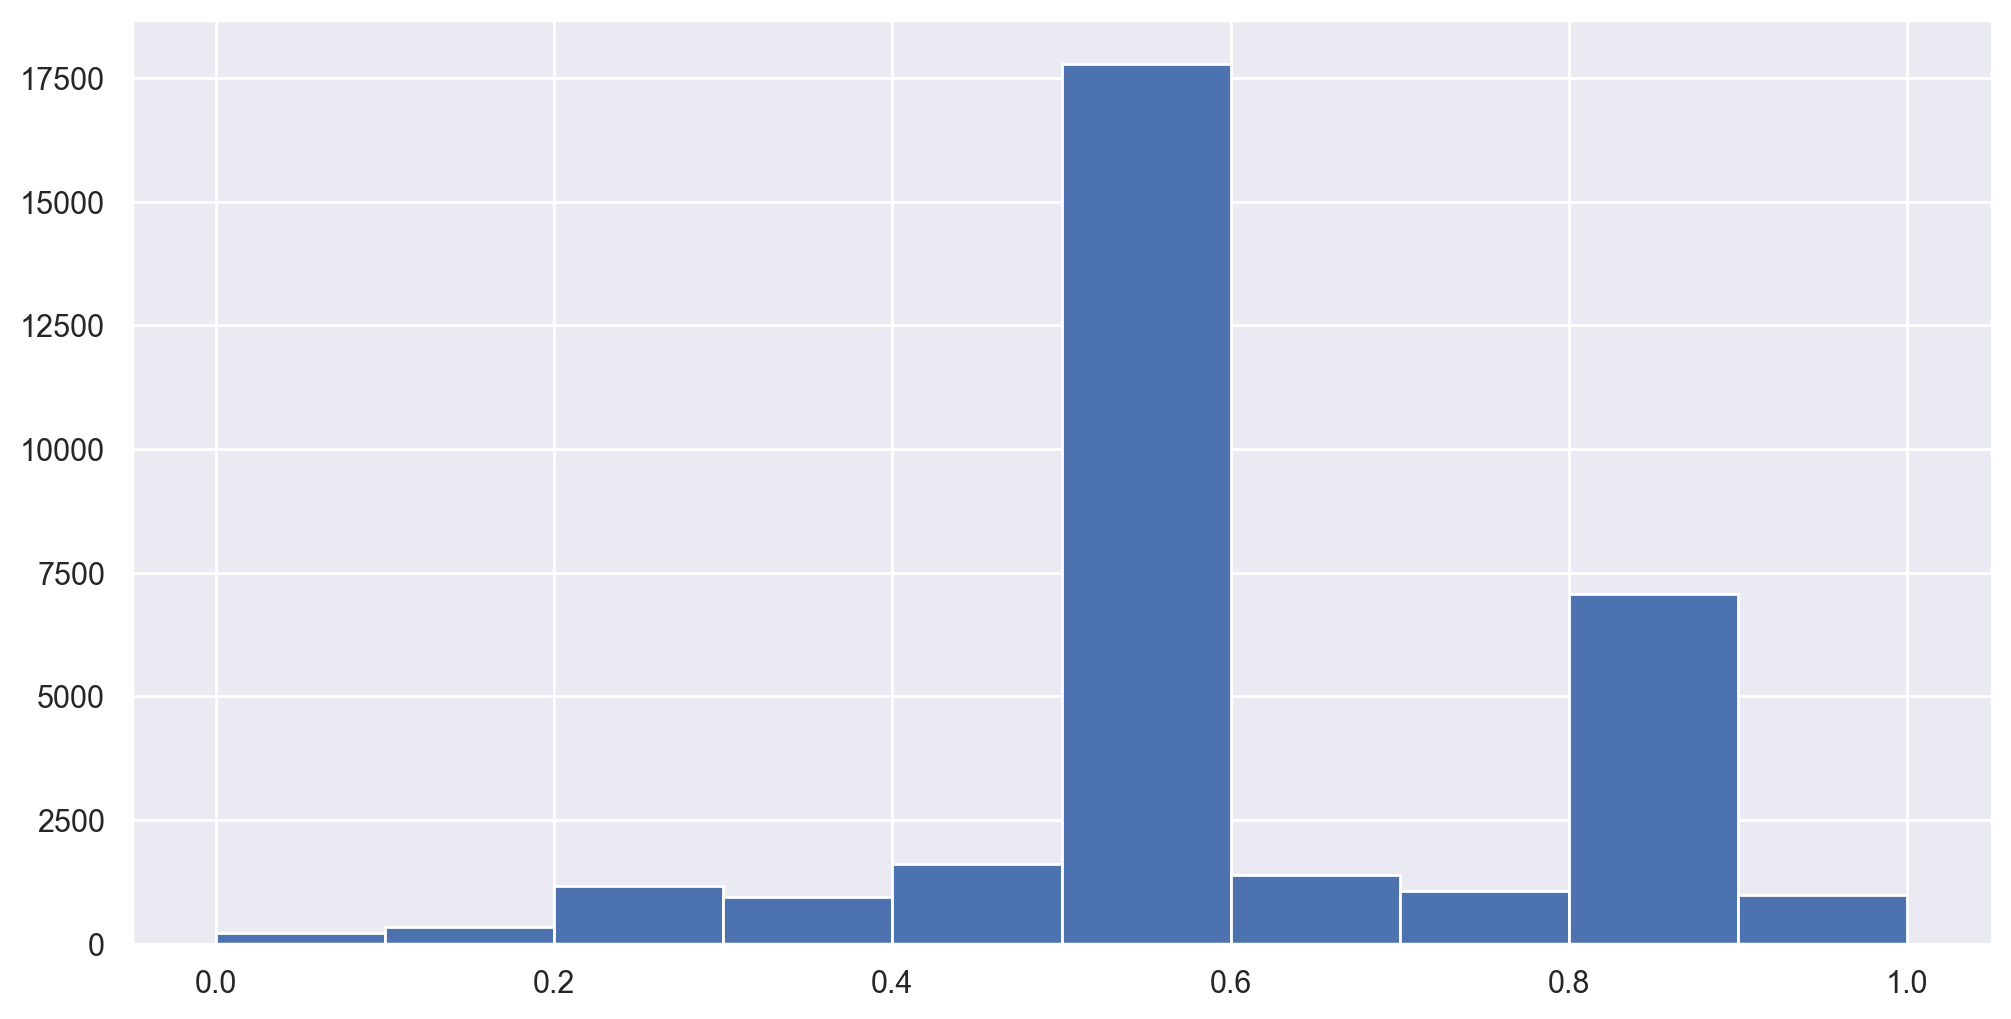

Column: occupation


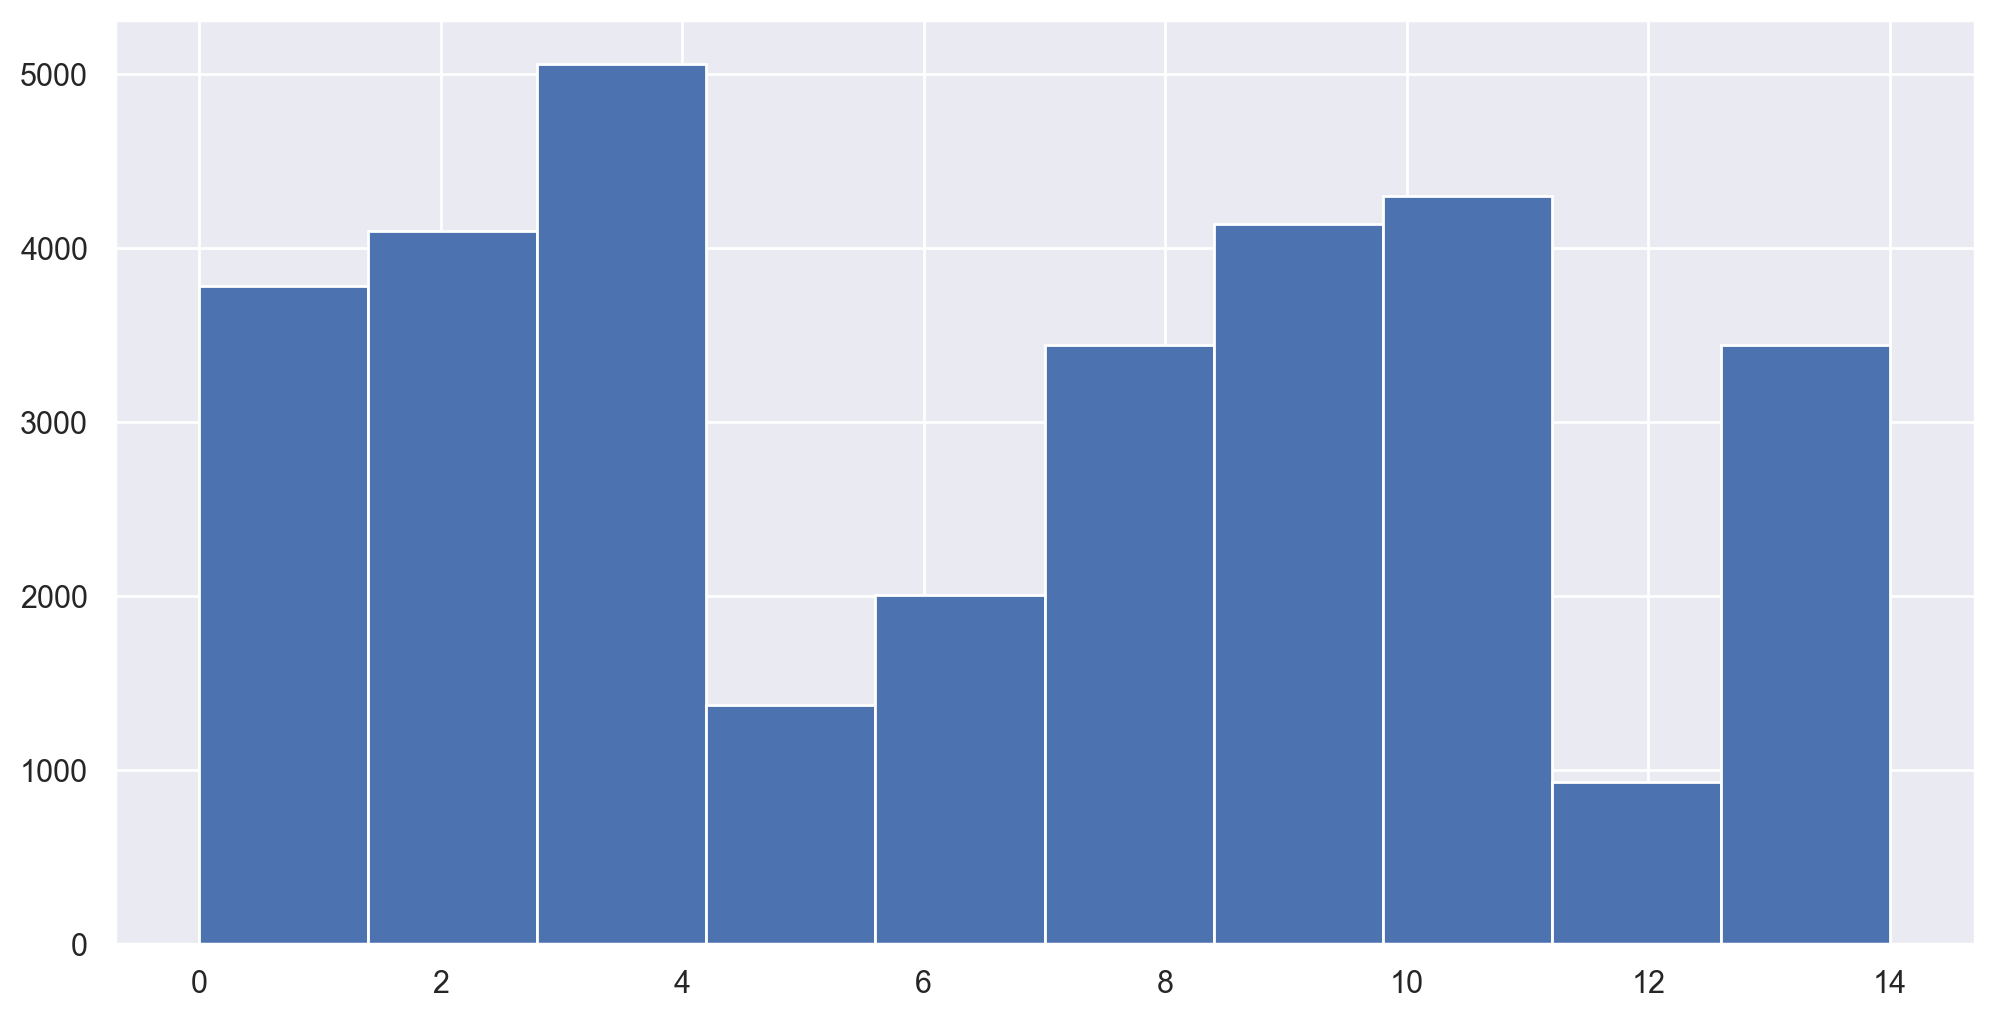

Column: relationship


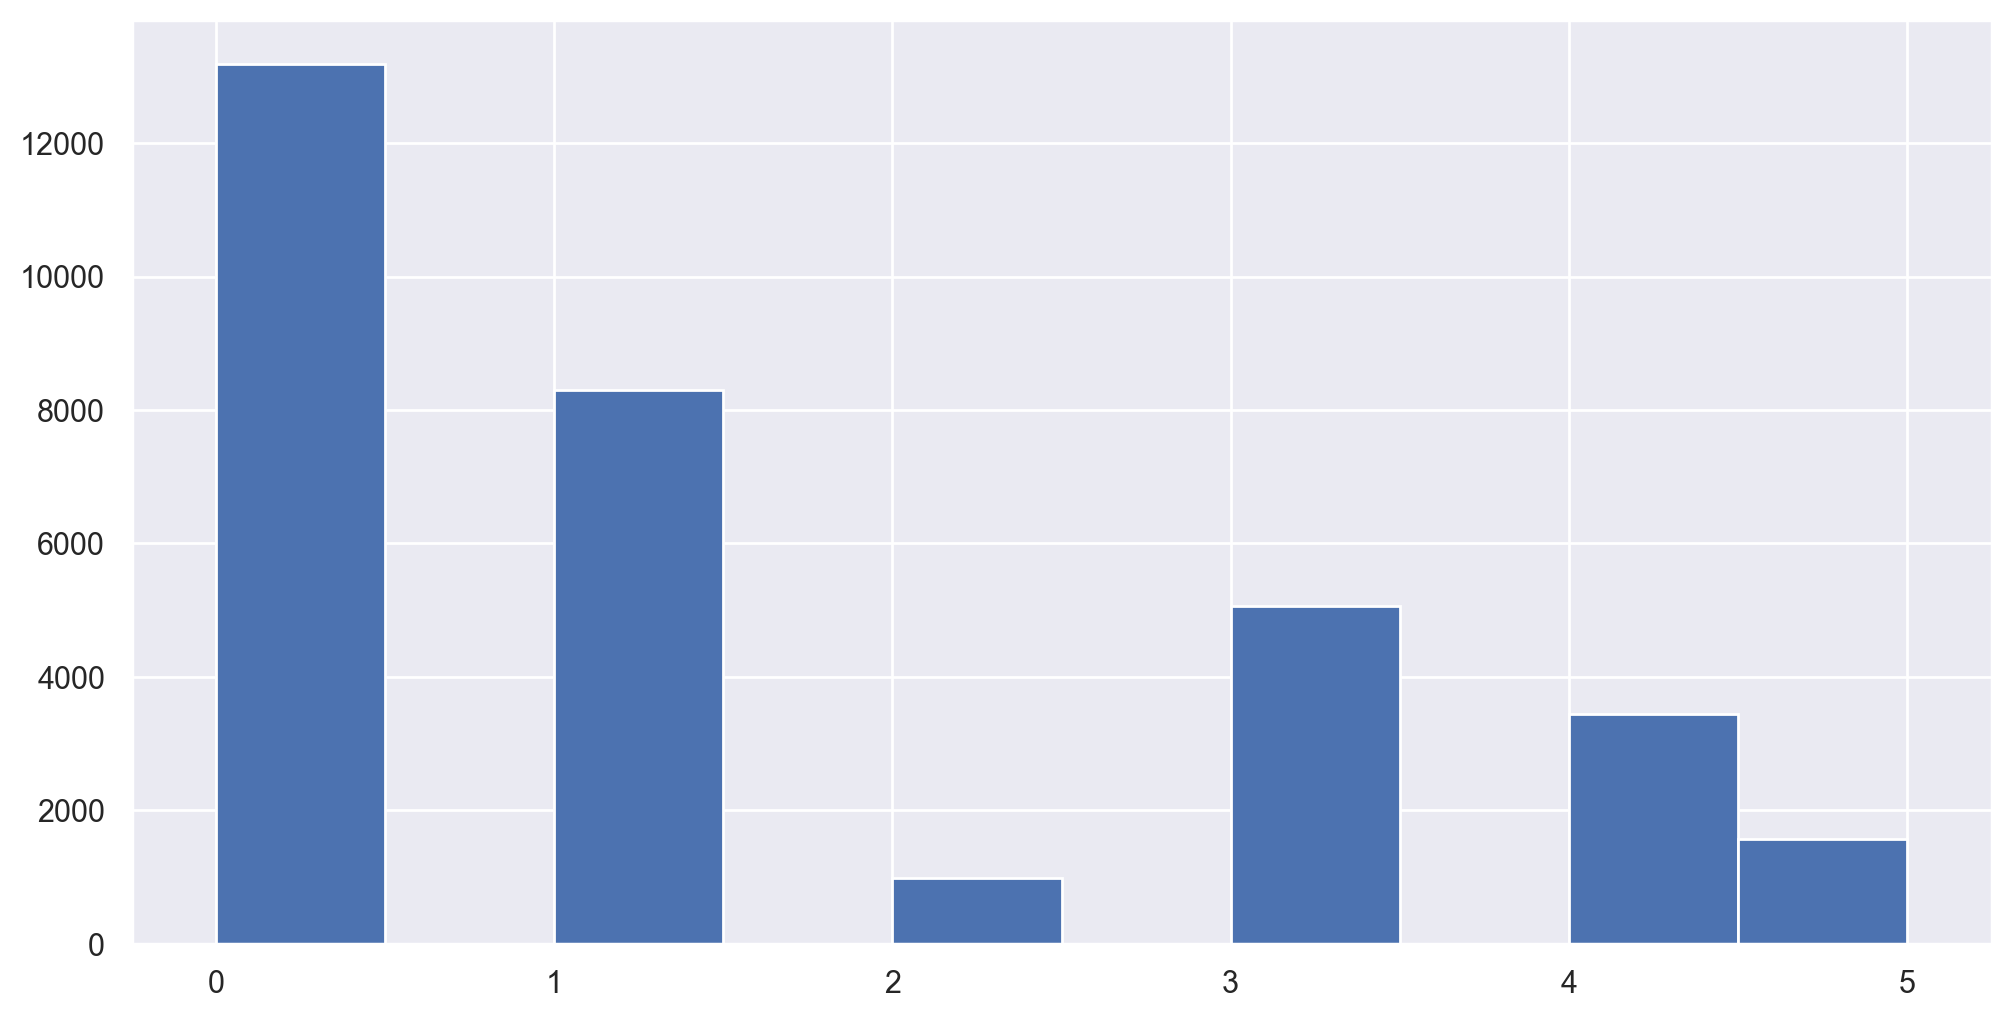

Column: race


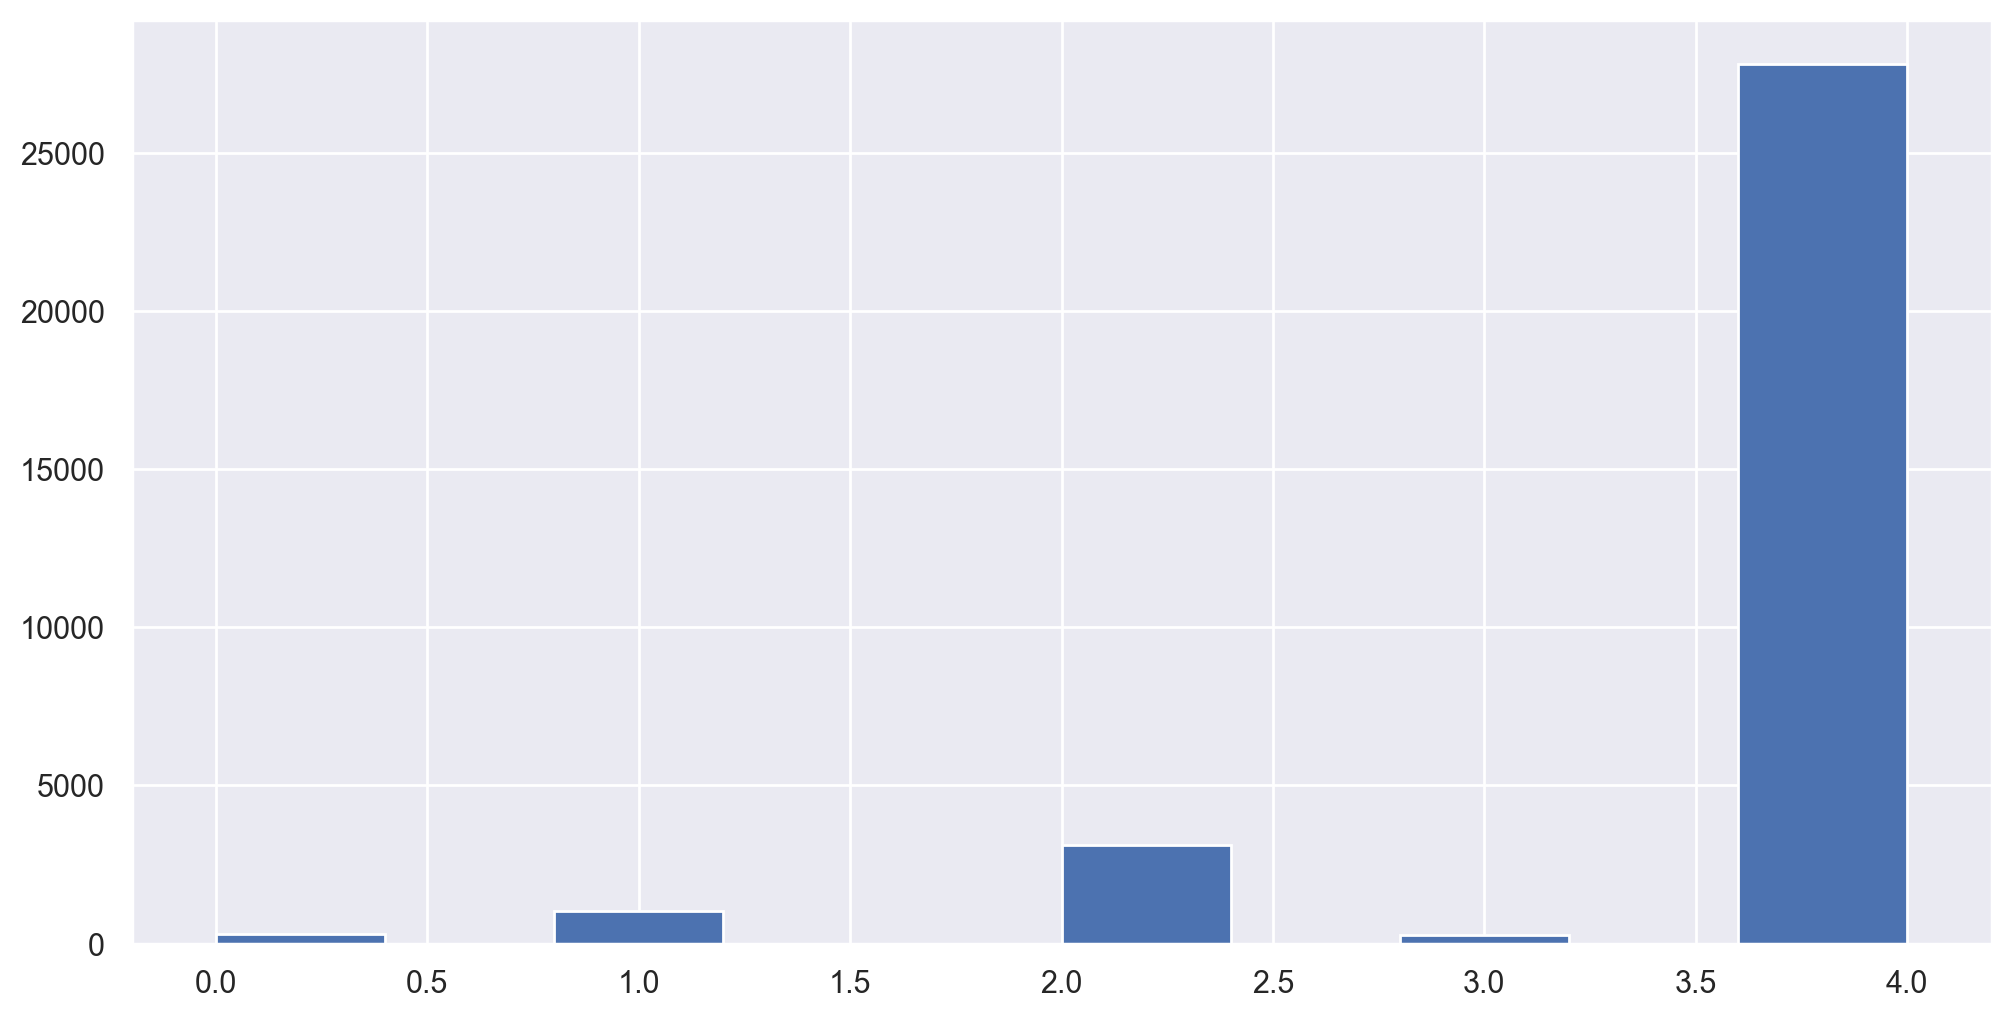

Column: capital_gain


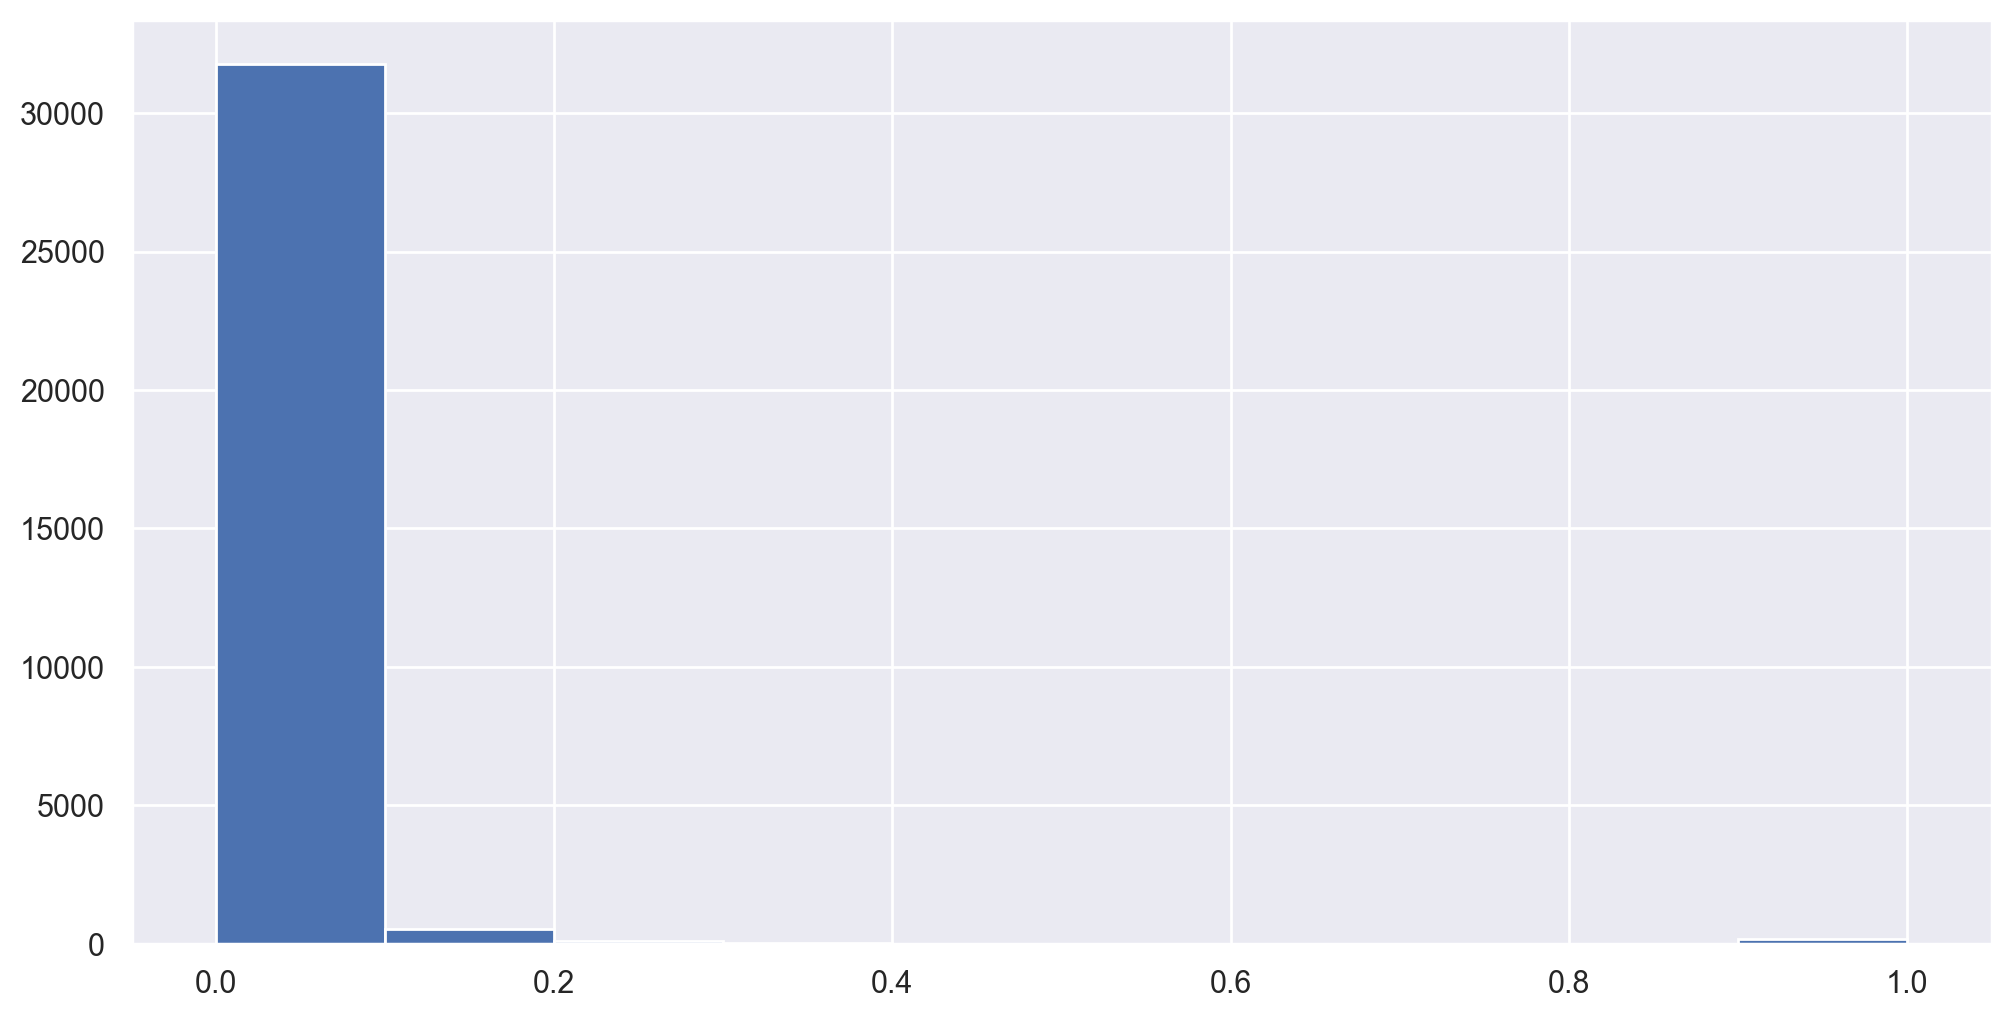

Column: capital_loss


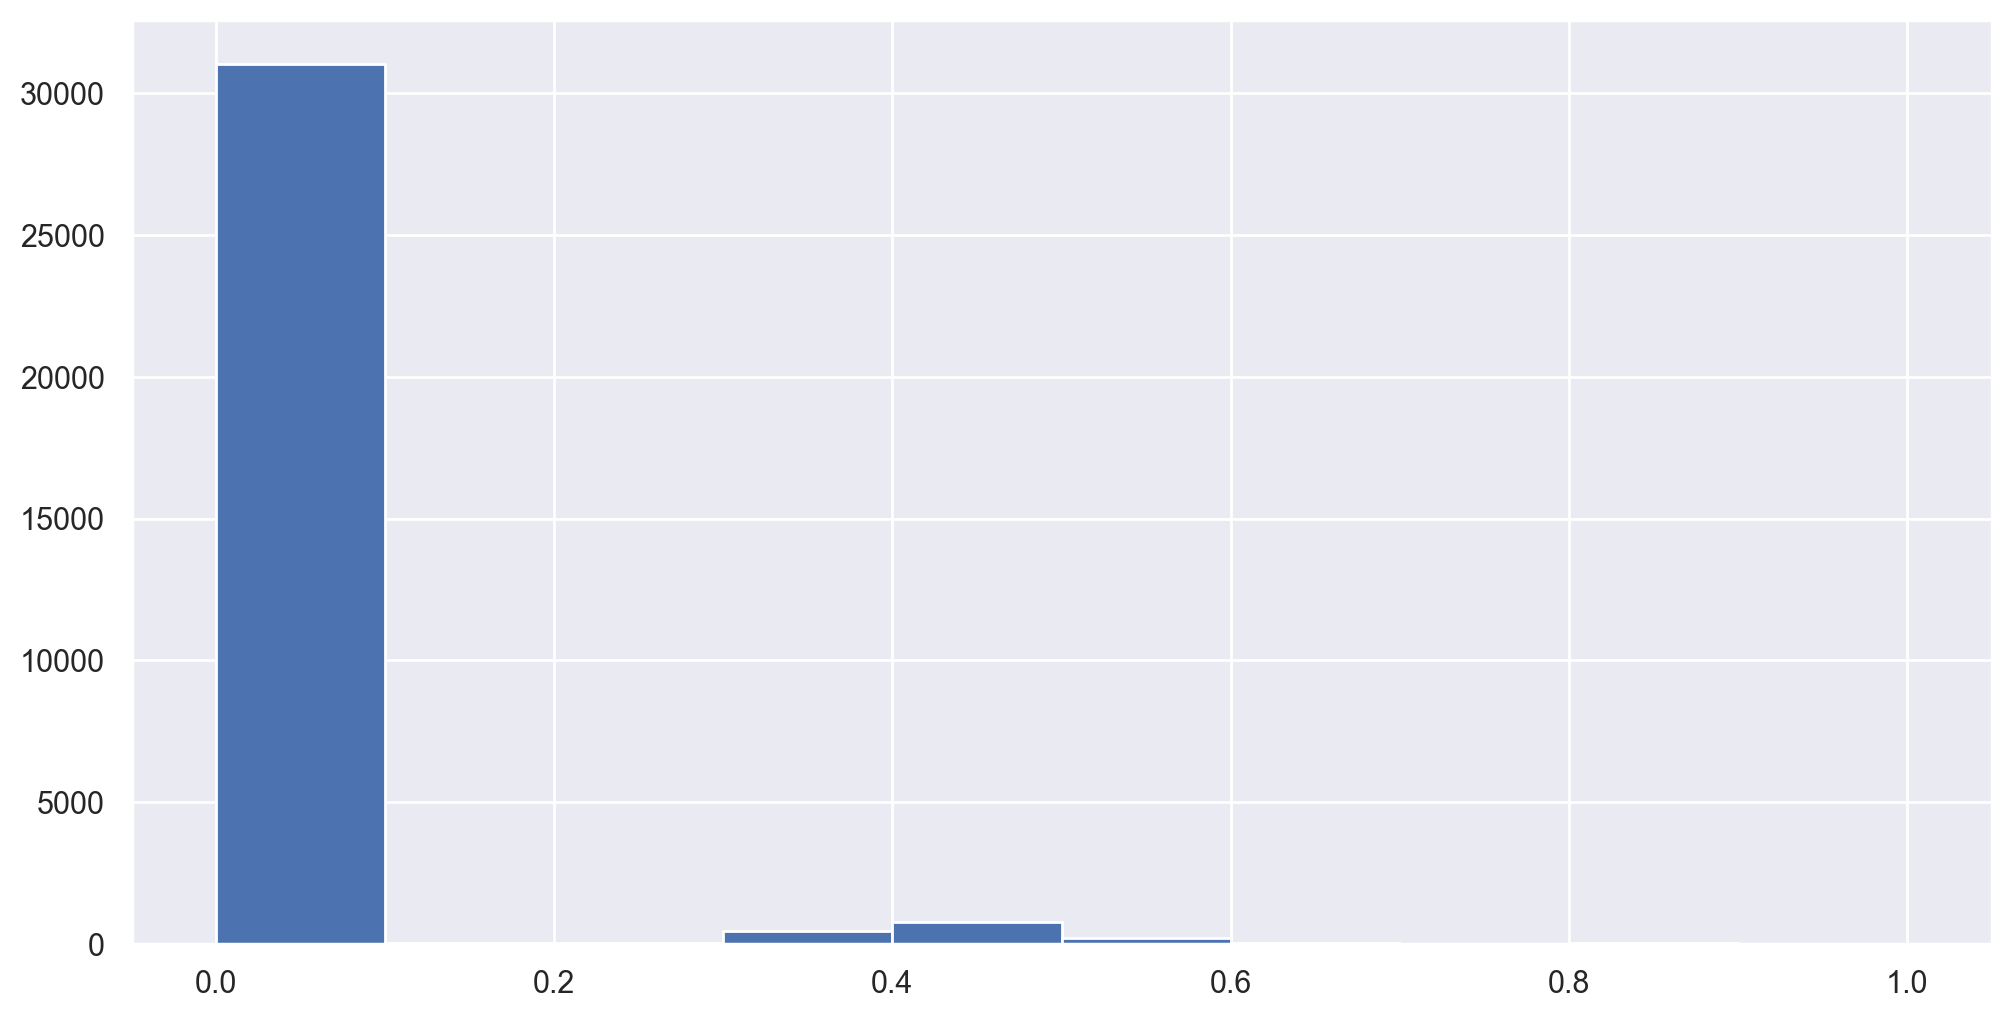

Column: hours_per_week


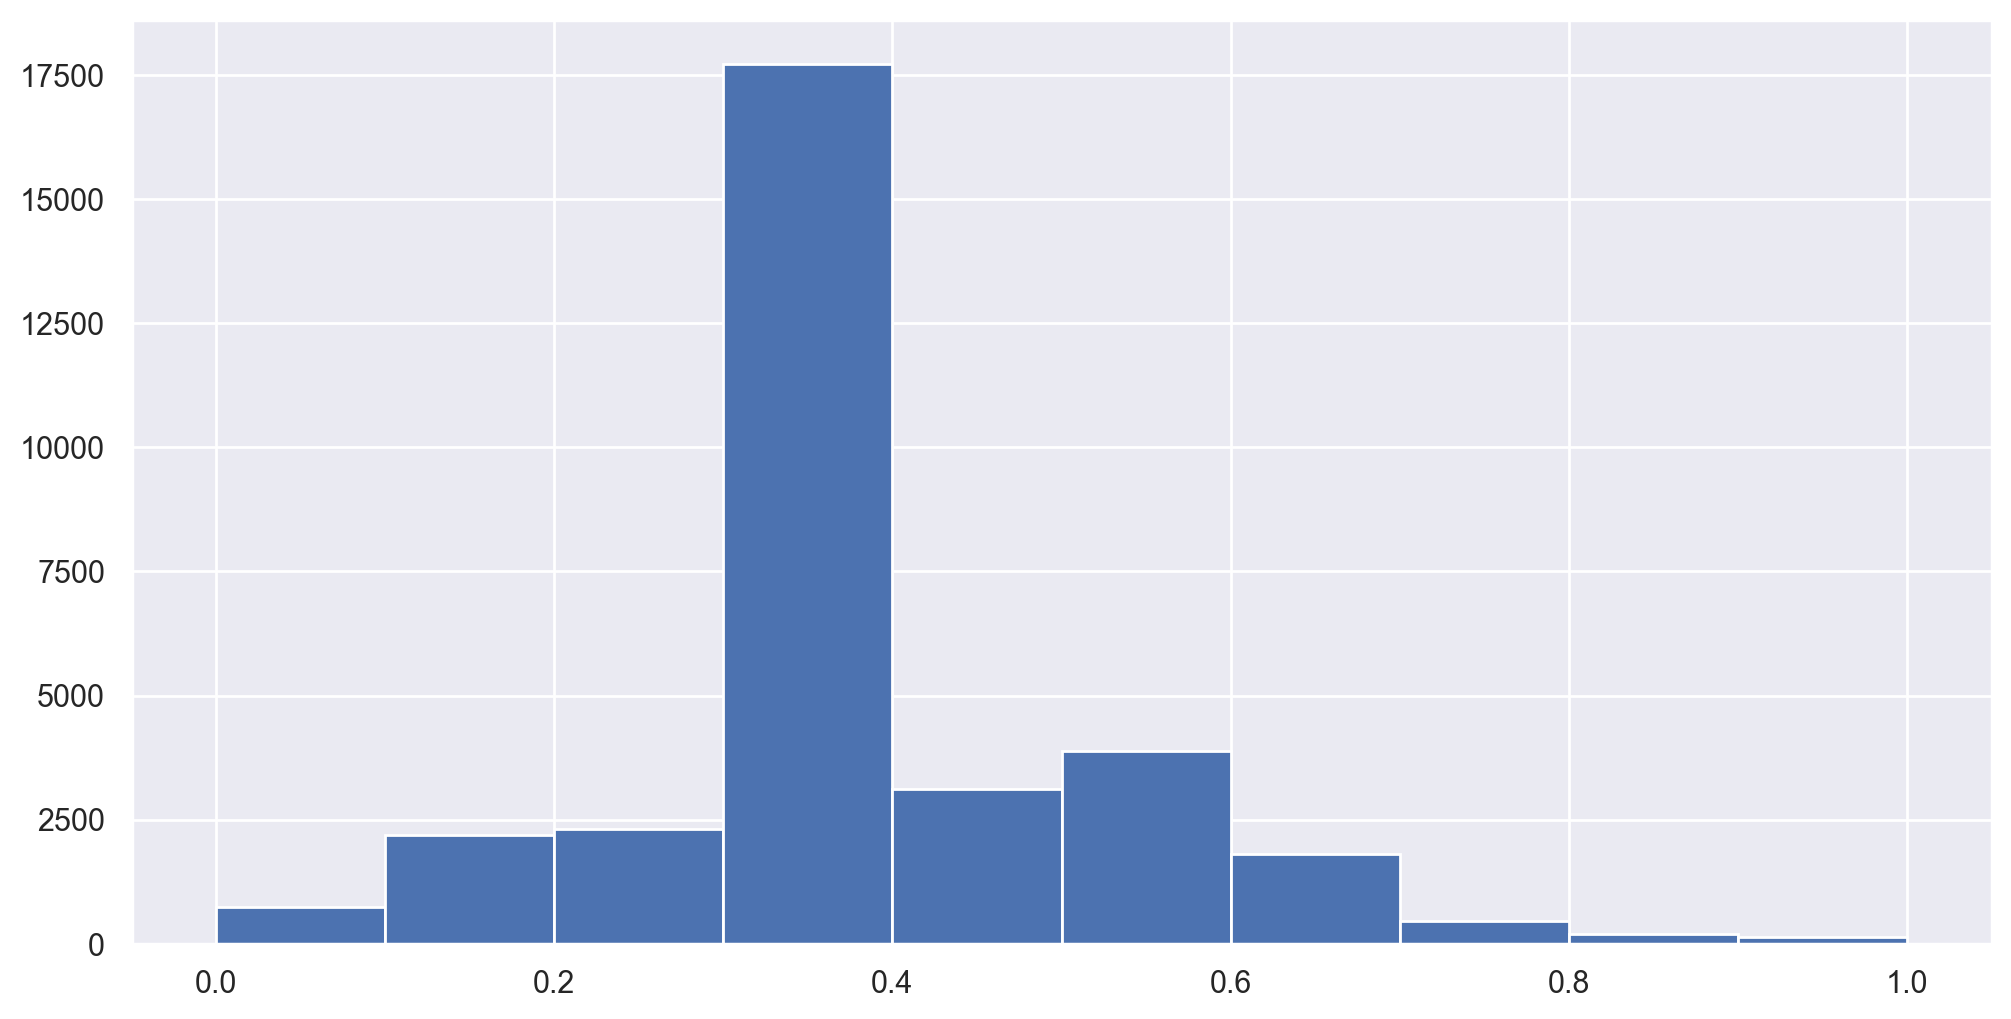

Column: income


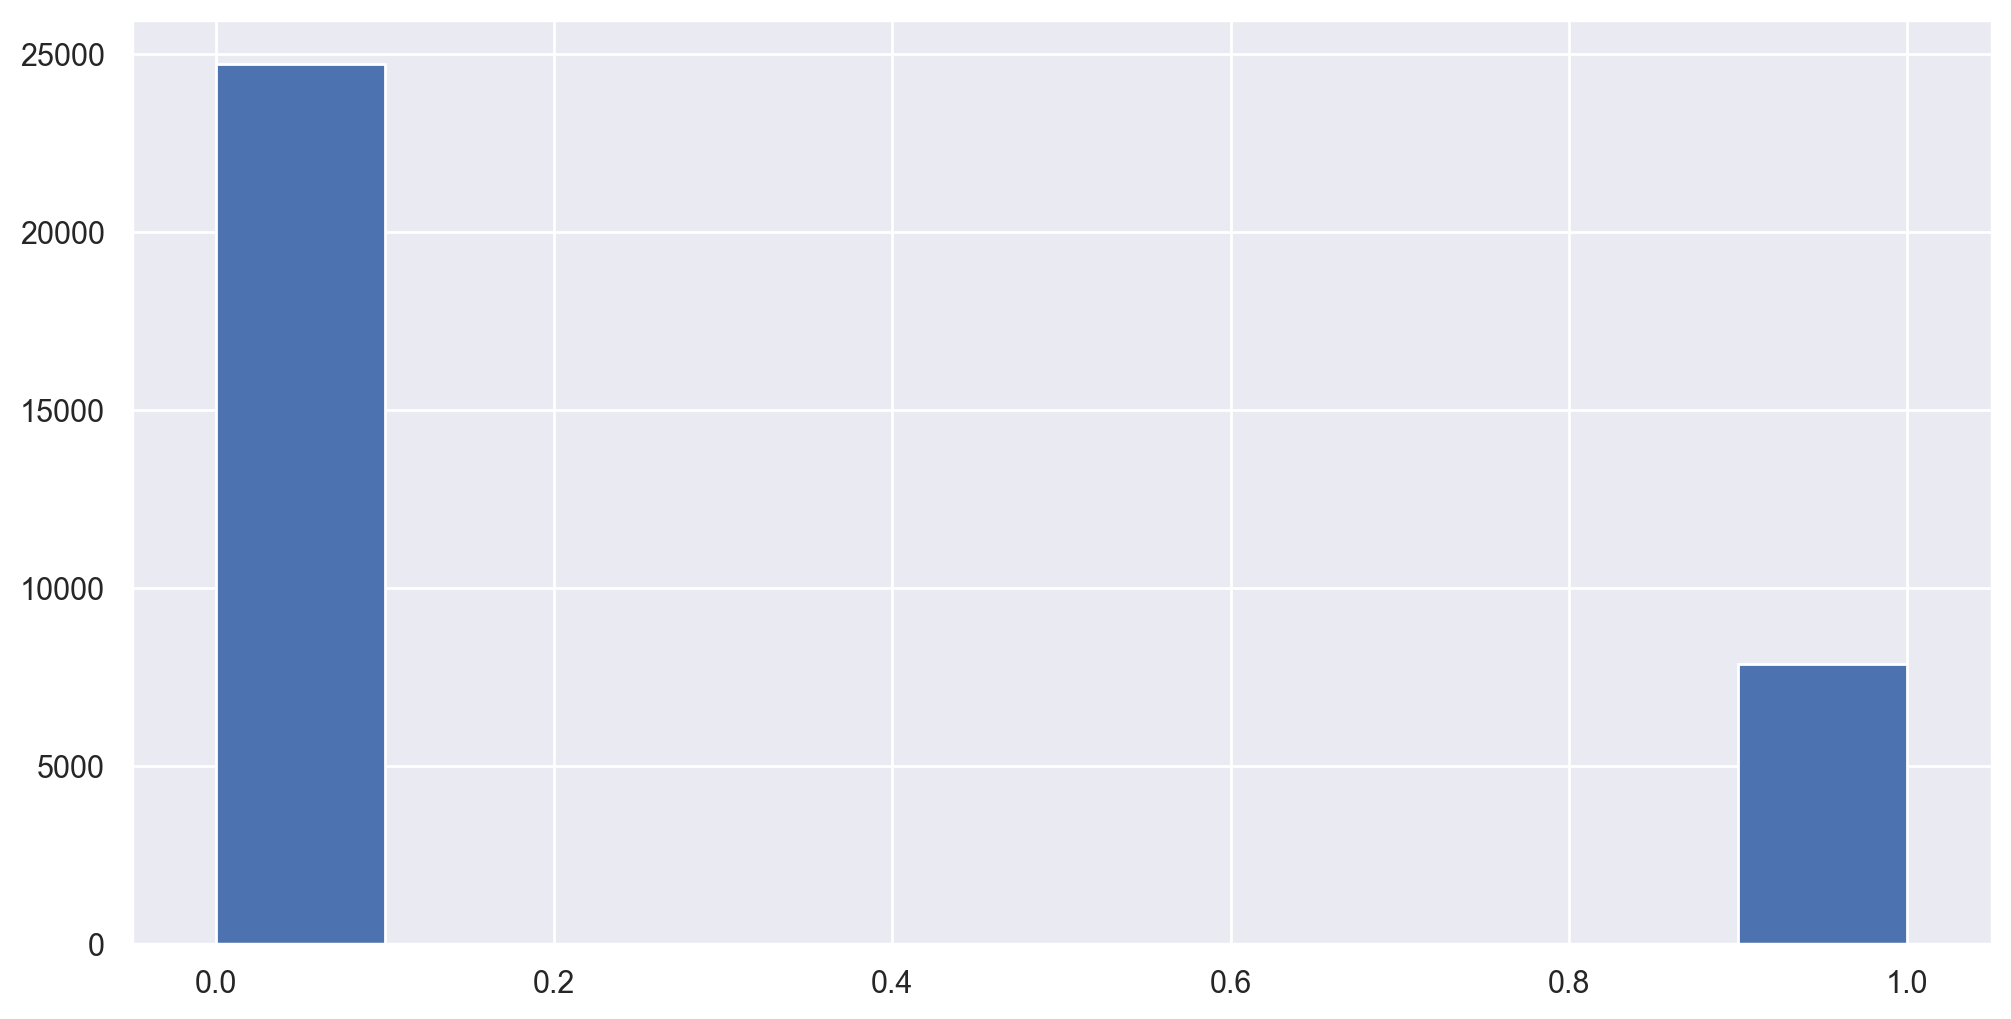

Column: sex_Female


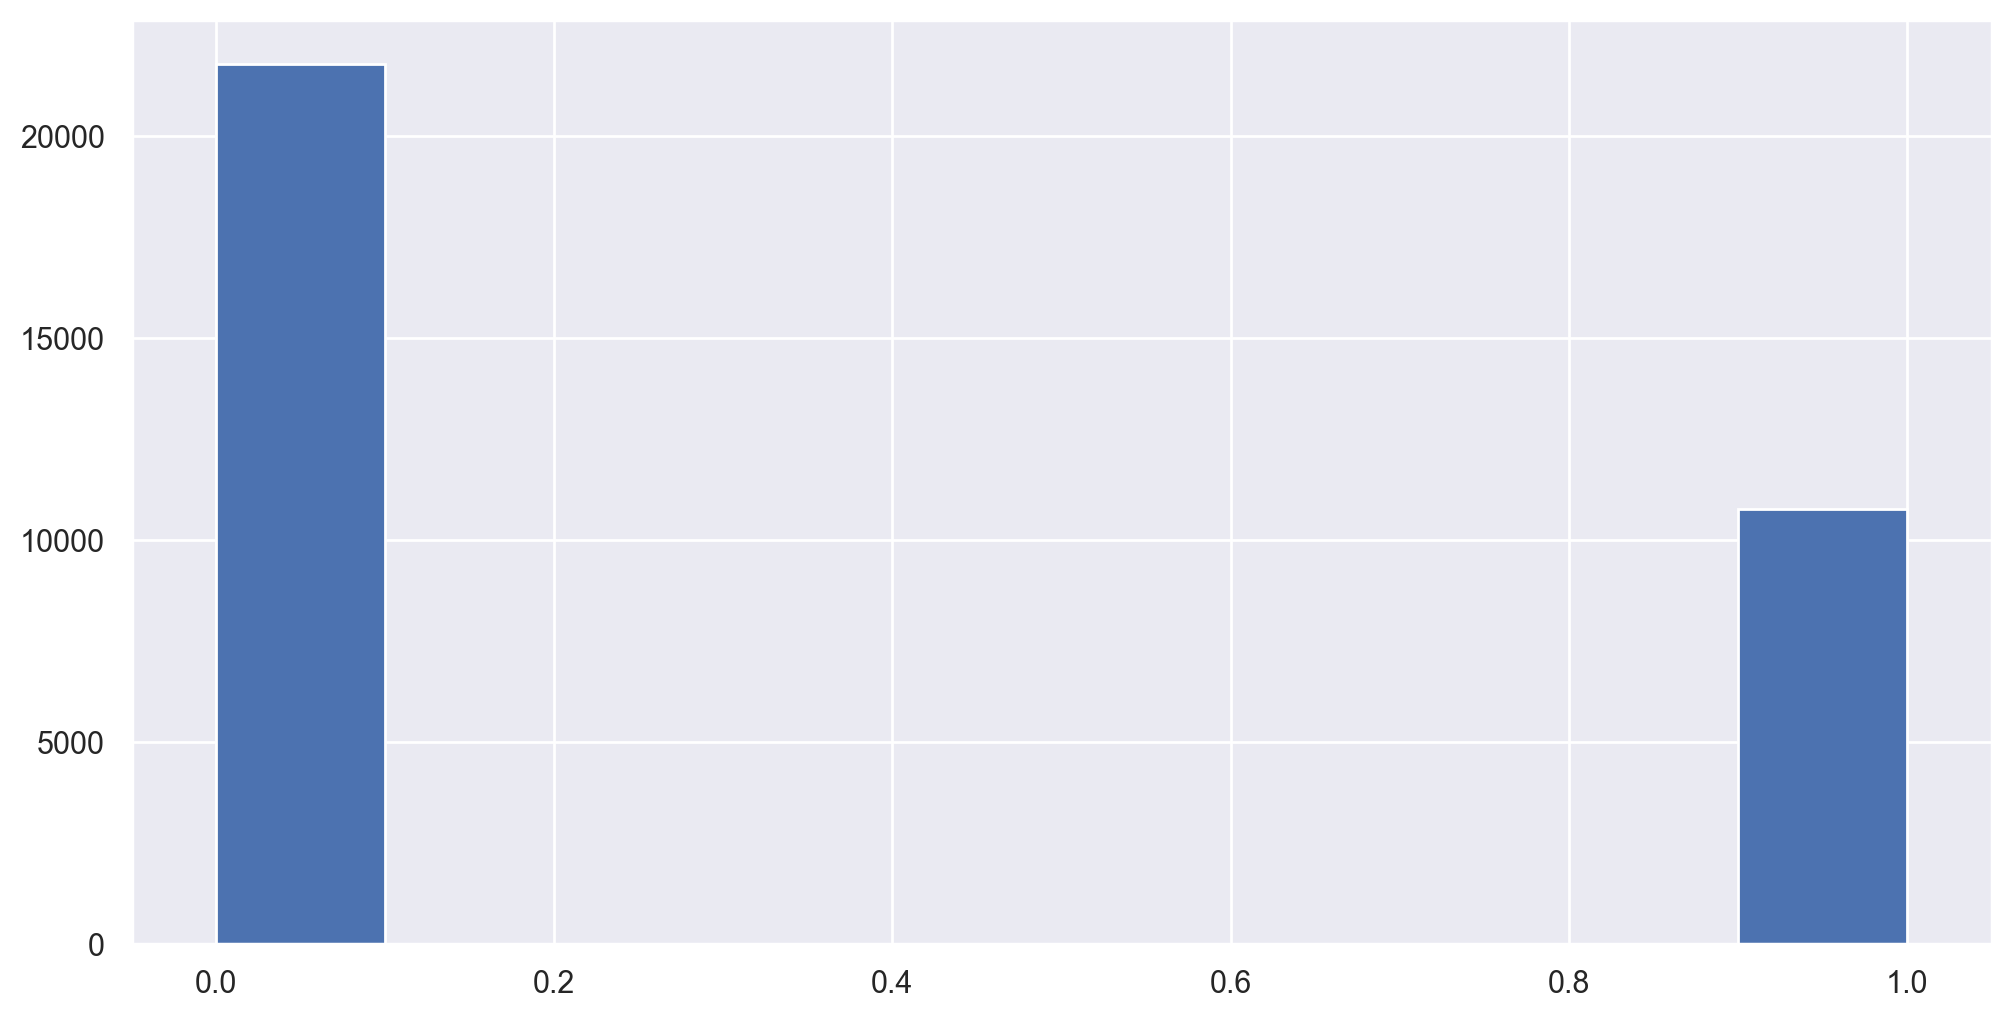

Column: sex_Male


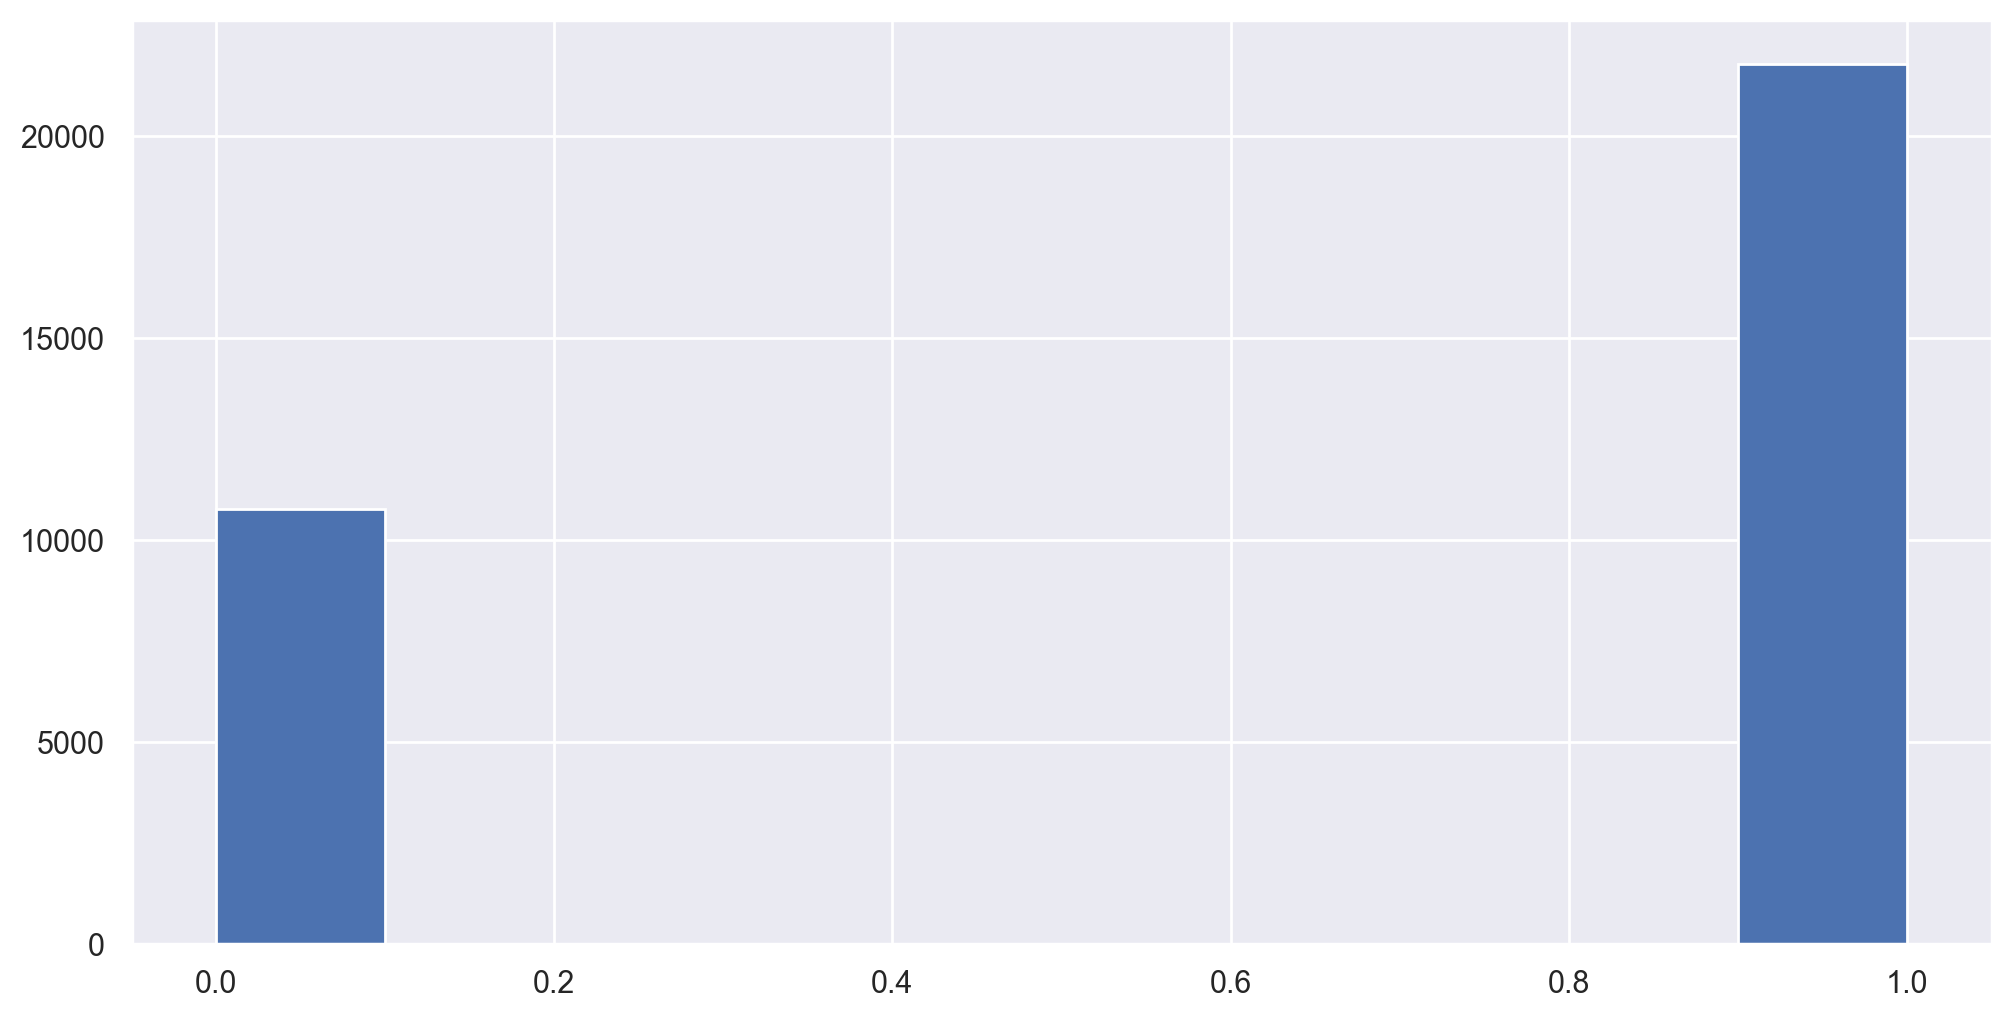

Column: marital_status_new


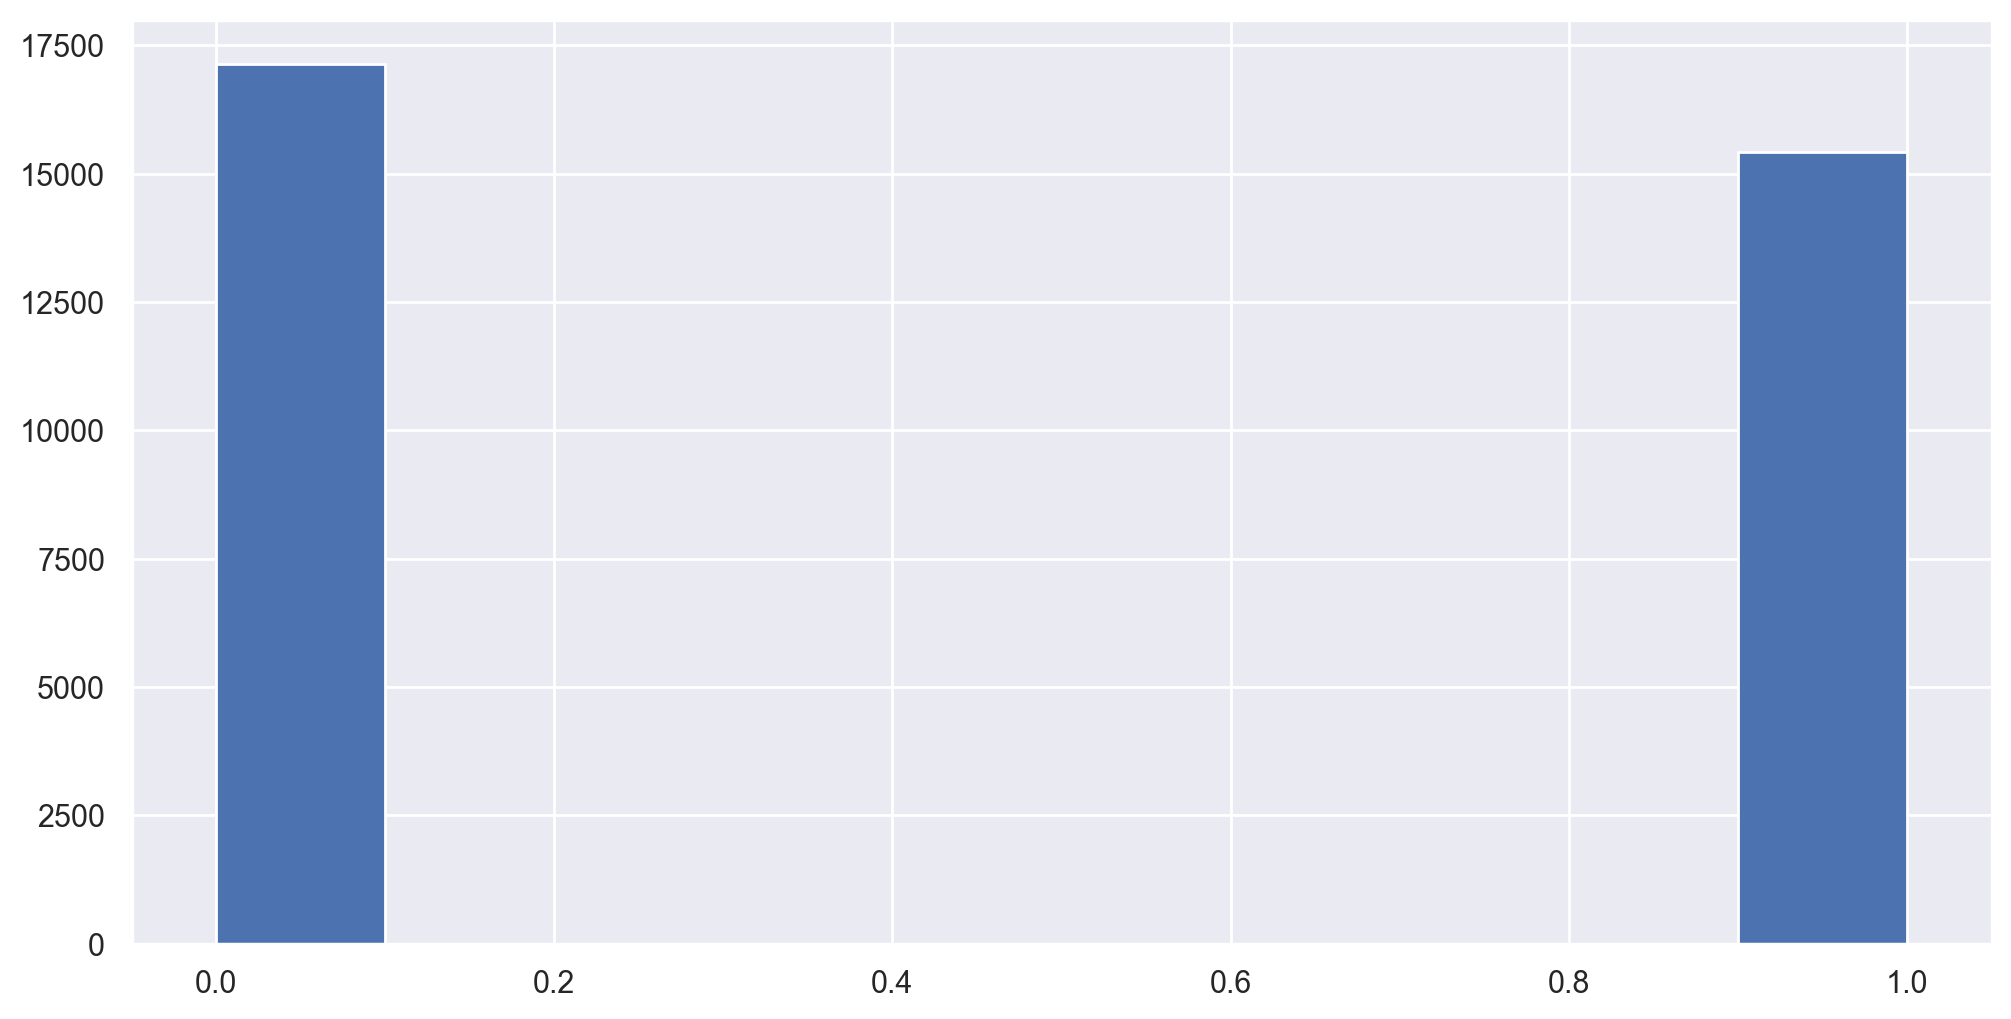

Column: native_country_new


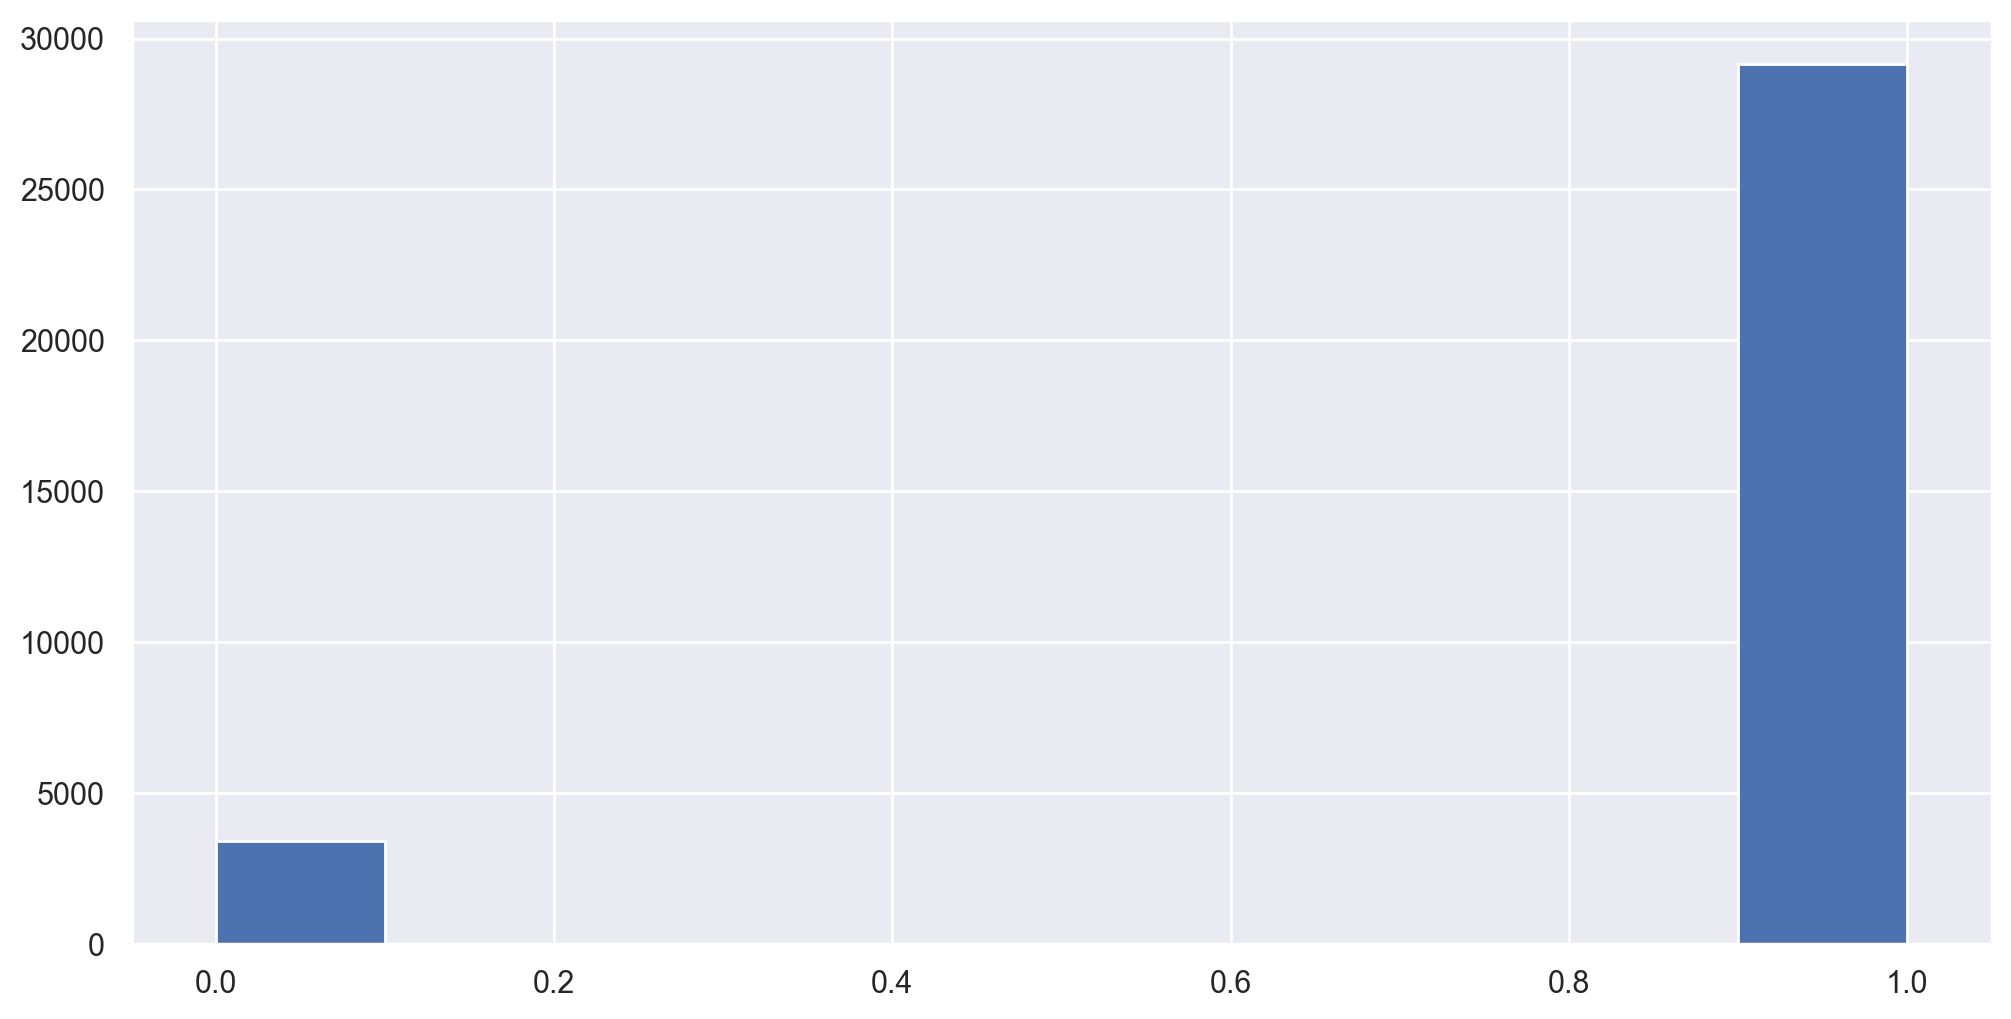

In [39]:
for col in df.columns:
    print('Column:',col)
    plt.hist(df[col])
    plt.show()


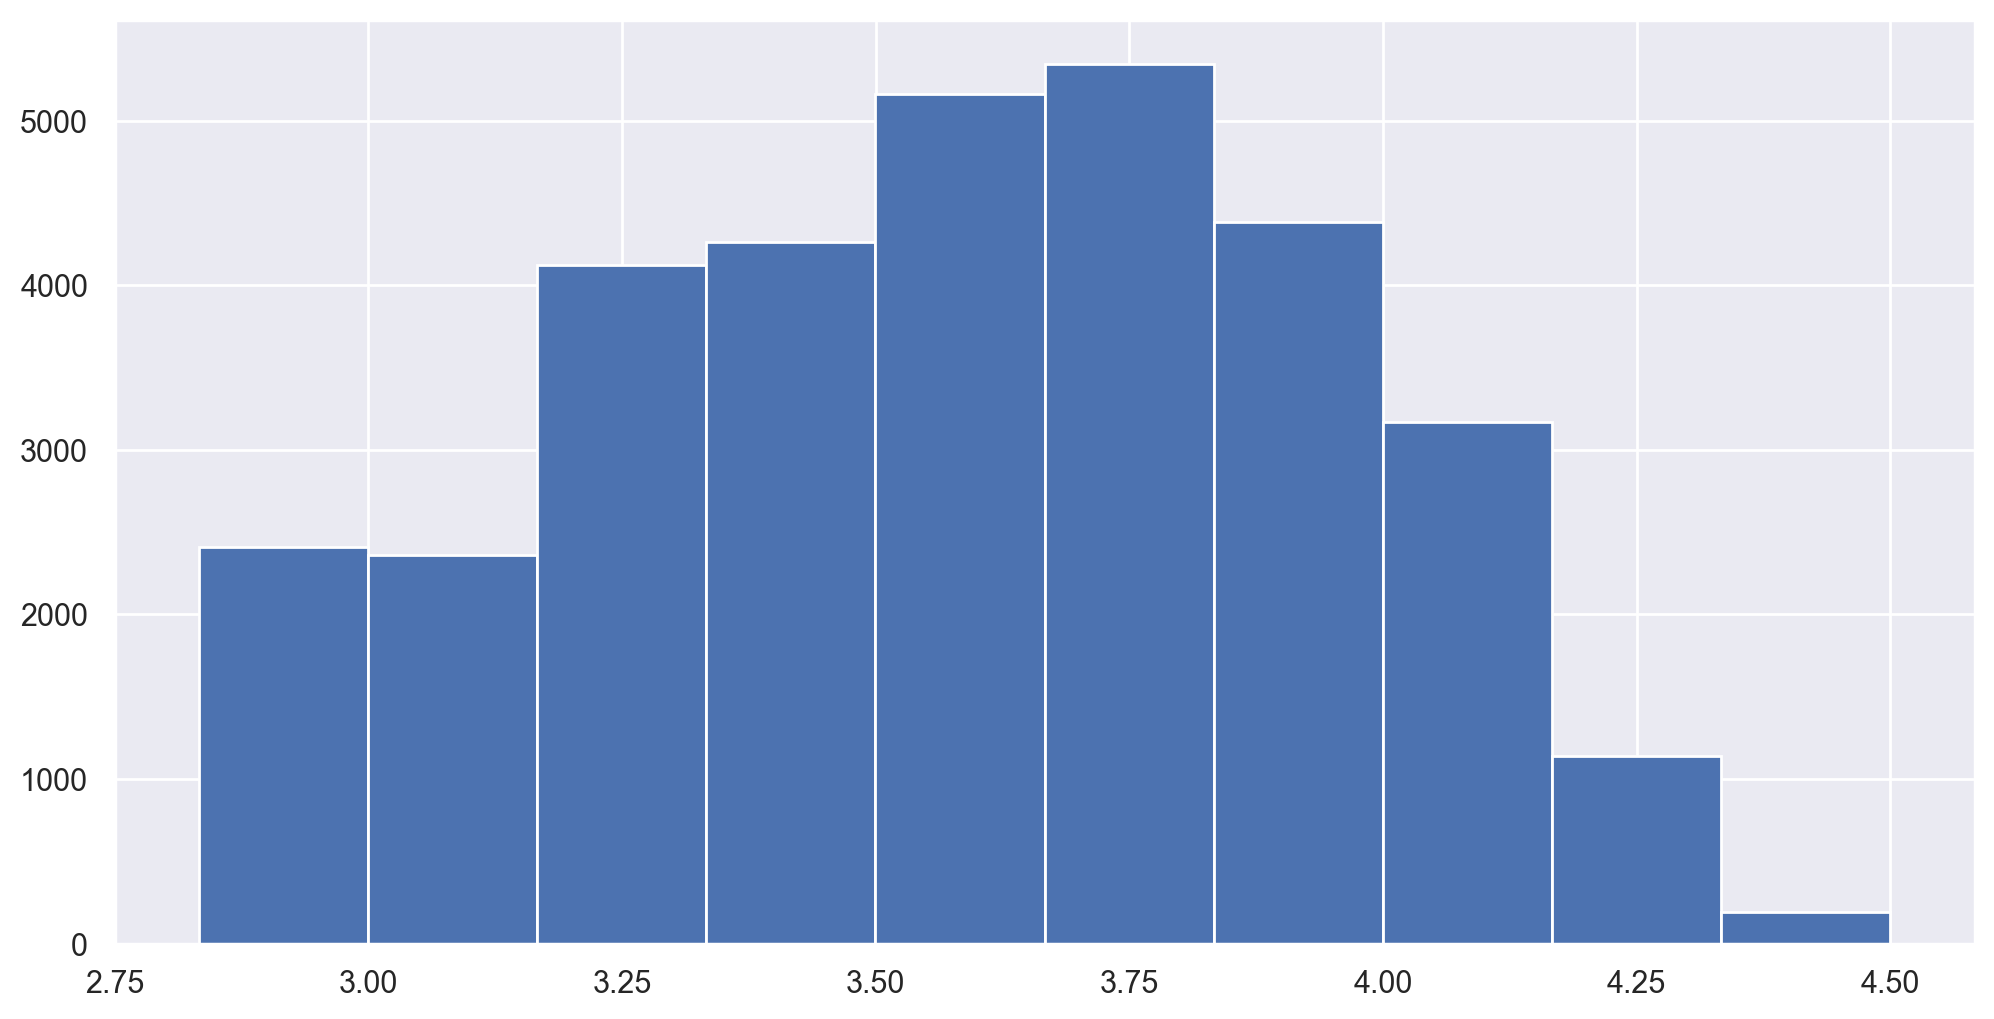

In [40]:
# As the "age" column is highly skewed, we will apply log transformation on "age" column

df['log_age'] = np.log(data['age'])
plt.hist(df['log_age'])
plt.show()

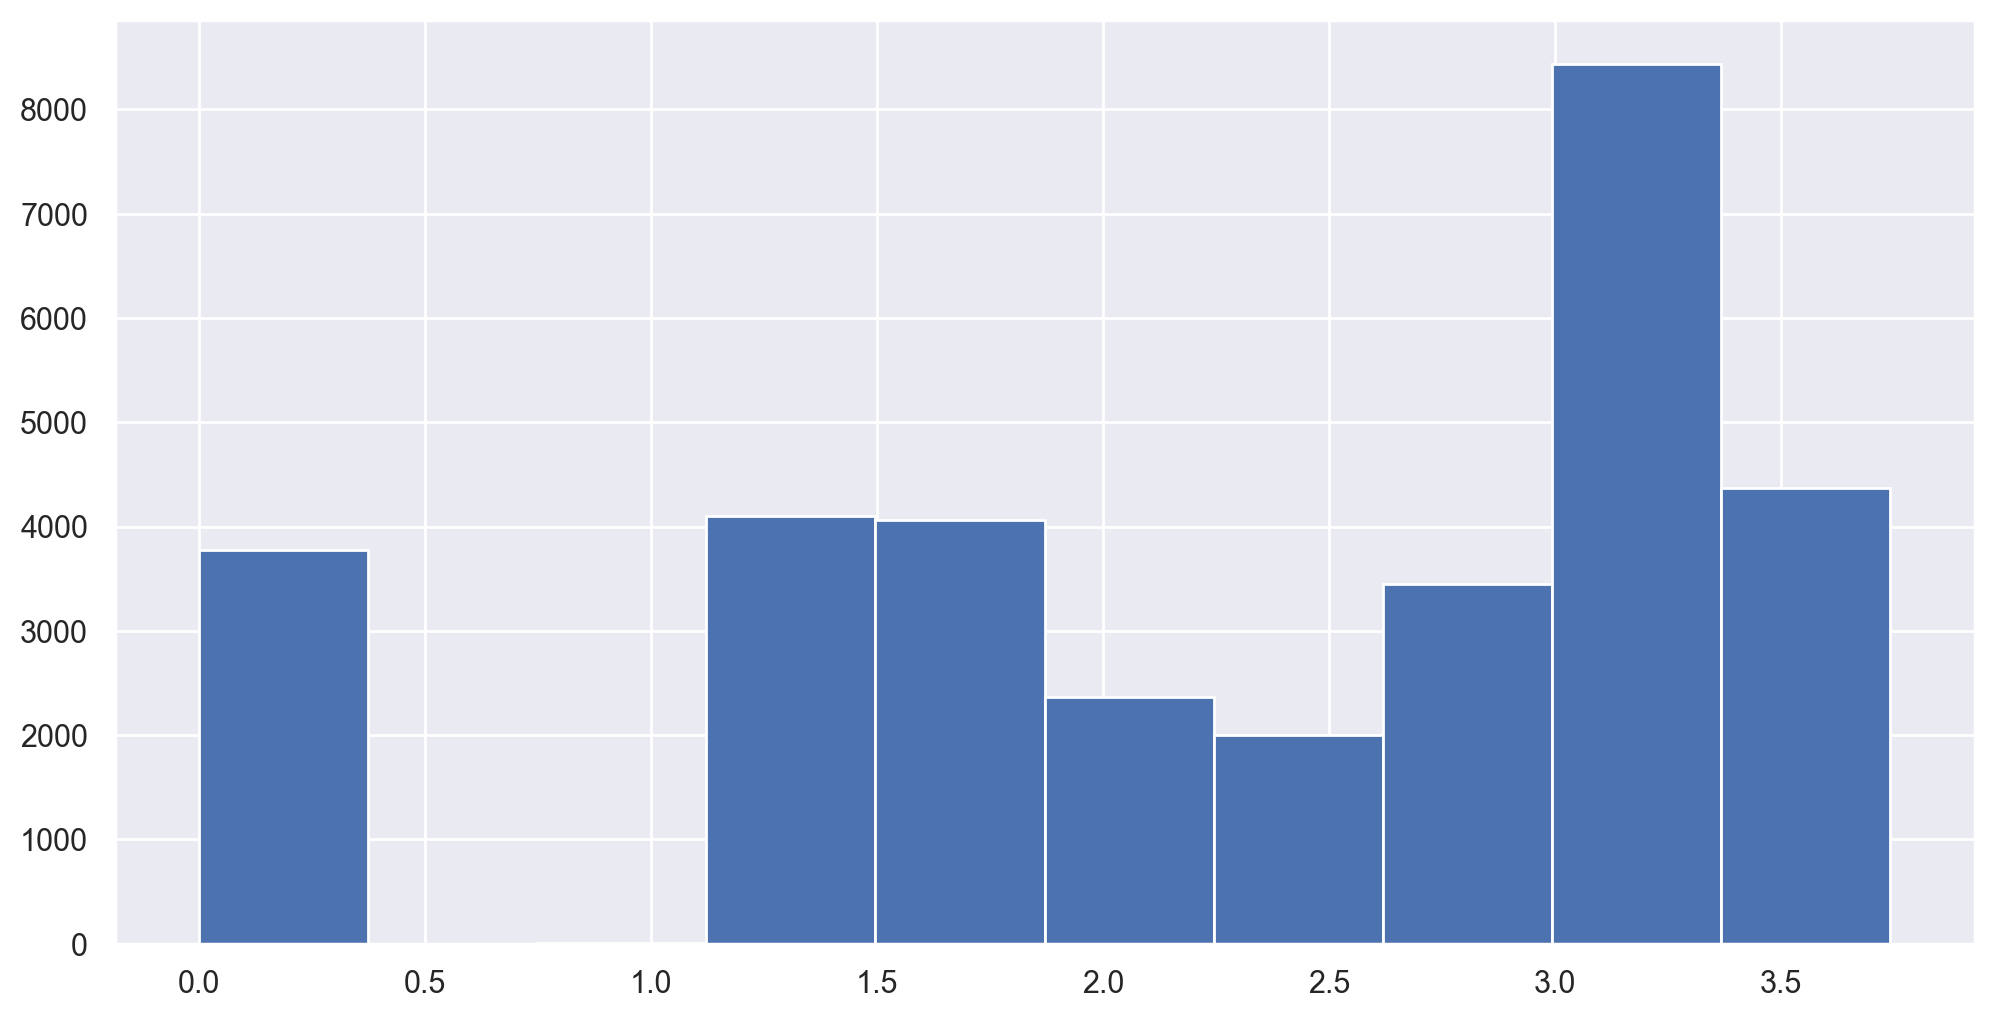

In [41]:
#Also we will apply "square root" transformation on "occupation" column

df['root_occupation'] = np.sqrt(df['occupation'])
plt.hist(df['root_occupation'])
plt.show()

In [42]:
#Now, we will delete "age" and "occupation" columns

df.drop(columns=['age','occupation'], inplace=True)
df.describe()

,workclass,fnlwgt,education,education_num,relationship,race,capital_gain,capital_loss,hours_per_week,income,sex_Female,sex_Male,marital_status_new,native_country_new,log_age,root_occupation
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,3.376371,0.120545,10.298210,0.605379,1.446362,3.665858,0.010777,0.020042,0.402423,0.240810,0.330795,0.669205,0.473481,0.895857,3.589360,2.284619
std,1.582038,0.071685,3.870264,0.171515,1.606771,0.848806,0.073854,0.092507,0.125994,0.427581,0.470506,0.470506,0.499304,0.305451,0.360379,1.096501
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.833213,0.000000
25%,3.000000,0.071679,9.000000,0.533333,0.000000,4.000000,0.000000,0.000000,0.397959,0.000000,0.000000,0.000000,0.000000,1.000000,3.332205,1.732051
50%,3.000000,0.112788,11.000000,0.600000,1.000000,4.000000,0.000000,0.000000,0.397959,0.000000,0.000000,1.000000,0.000000,1.000000,3.610918,2.449490
75%,3.000000,0.152651,12.000000,0.733333,3.000000,4.000000,0.000000,0.000000,0.448980,0.000000,1.000000,1.000000,1.000000,1.000000,3.871201,3.162278
max,8.000000,1.000000,15.000000,1.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.499810,3.741657


## Feature Selection

Using the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.

In [43]:
X = df.drop(columns = ['income'])

In [44]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest()
iso.fit(X)
ypred = iso.predict(X)
ypred

array([ 1,  1,  1, ...,  1,  1, -1])

In [45]:
df['Outliers'] = ypred
df

,workclass,fnlwgt,education,education_num,relationship,race,capital_gain,capital_loss,hours_per_week,income,sex_Female,sex_Male,marital_status_new,native_country_new,log_age,root_occupation,Outliers
0,6,0.044302,9,0.800000,1,4,0.021740,0.0,0.397959,0,0,1,0,1,3.663562,0.000000,1
1,5,0.048238,9,0.800000,0,4,0.000000,0.0,0.122449,0,0,1,1,1,3.912023,1.732051,1
2,3,0.138113,11,0.533333,1,4,0.000000,0.0,0.397959,0,0,1,0,1,3.637586,2.236068,1
3,3,0.151068,1,0.400000,0,2,0.000000,0.0,0.397959,0,0,1,1,1,3.970292,2.236068,1
4,3,0.221488,9,0.800000,5,2,0.000000,0.0,0.397959,0,1,0,1,0,3.332205,3.000000,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,3,0.166404,7,0.733333,5,4,0.000000,0.0,0.377551,0,1,0,1,1,3.295837,3.464102,-1
32557,3,0.096500,11,0.533333,0,4,0.000000,0.0,0.397959,1,0,1,1,1,3.688879,2.449490,1
32558,3,0.094827,11,0.533333,4,4,0.000000,0.0,0.397959,0,1,0,0,1,4.060443,0.000000,1
32559,3,0.128499,11,0.533333,3,4,0.000000,0.0,0.193878,0,0,1,0,1,3.091042,0.000000,1


In [46]:
df['Outliers'].value_counts()

Outliers
 1    26472
-1     6089
Name: count, dtype: int64

In [47]:
df.groupby(["Outliers"]).mean()

,workclass,fnlwgt,education,education_num,relationship,race,capital_gain,capital_loss,hours_per_week,income,sex_Female,sex_Male,marital_status_new,native_country_new,log_age,root_occupation
Outliers,,,,,,,,,,,,,,,,
-1,4.037445,0.131464,8.995237,0.565763,2.529808,3.038594,0.036015,0.038886,0.366791,0.240762,0.578092,0.421908,0.437839,0.637543,3.577282,2.403171
1,3.224312,0.118034,10.597915,0.614491,1.197152,3.810139,0.004971,0.015708,0.410619,0.240820,0.273912,0.726088,0.481679,0.955273,3.592138,2.257350


In [48]:
df.groupby(["Outliers", "native_country_new"]).mean()

workclass    fnlwgt  education  education_num  \
Outliers native_country_new                                                  
-1       0                    3.498867  0.138302   9.019030       0.545567   
         1                    4.343637  0.127577   8.981710       0.577245   
 1       0                    3.115709  0.132779   9.689189       0.571059   
         1                    3.229397  0.117343  10.640462       0.616524   

                             relationship      race  capital_gain  \
Outliers native_country_new                                         
-1       0                       1.988219  2.747168      0.014253   
         1                       2.837713  3.204276      0.048387   
 1       0                       0.656250  3.778716      0.001443   
         1                       1.222477  3.811610      0.005137   

                             capital_loss  hours_per_week    income  \
Outliers native_country_new                                           
-1       0                       0.023933        0.395467  0.186226   
         1                       0.047386        0.350487  0.271767   
 1       0                       0.005964        0.412800  0.218750   
         1                       0.016164        0.410517  0.241854   

                             sex_Female  sex_Male  marital_status_new  \
Outliers native_country_new                                             
-1       0                     0.446307  0.553693            0.463978   
         1                     0.653014  0.346986            0.422978   
 1       0                     0.087838  0.912162            0.632601   
         1                     0.282624  0.717376            0.474612   

                              log_age  root_occupation  
Outliers native_country_new                             
-1       0                   3.564782         2.309147  
         1                   3.584388         2.456627  
 1       0                   3.606790         2.319591  
         1                   3.591452         2.254436

In [49]:
# Removing outliers

new_df = df[df['Outliers'] == 1]
new_df.drop(columns = ['Outliers'], inplace=True)
new_df

,workclass,fnlwgt,education,education_num,relationship,race,capital_gain,capital_loss,hours_per_week,income,sex_Female,sex_Male,marital_status_new,native_country_new,log_age,root_occupation
0,6,0.044302,9,0.800000,1,4,0.02174,0.0,0.397959,0,0,1,0,1,3.663562,0.000000
1,5,0.048238,9,0.800000,0,4,0.00000,0.0,0.122449,0,0,1,1,1,3.912023,1.732051
2,3,0.138113,11,0.533333,1,4,0.00000,0.0,0.397959,0,0,1,0,1,3.637586,2.236068
3,3,0.151068,1,0.400000,0,2,0.00000,0.0,0.397959,0,0,1,1,1,3.970292,2.236068
7,5,0.134036,11,0.533333,0,4,0.00000,0.0,0.448980,1,0,1,1,1,3.951244,1.732051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,3,0.210253,12,0.866667,0,4,0.00000,0.0,0.397959,1,0,1,1,1,3.970292,1.732051
32555,3,0.202298,15,0.600000,1,4,0.00000,0.0,0.397959,0,0,1,0,1,3.091042,3.162278
32557,3,0.096500,11,0.533333,0,4,0.00000,0.0,0.397959,1,0,1,1,1,3.688879,2.449490
32558,3,0.094827,11,0.533333,4,4,0.00000,0.0,0.397959,0,1,0,0,1,4.060443,0.000000
